# House Price Prediction - Advance Regression Assignment

## Business Goal

- Initially with the available independent variables we are preferred to model the price of houses.
- the management will make use of this model to understand how prices vary with variables.
- Then according to the understanding the management will manipulate the strategy of firm and concentrate on areas that will yield high returns.
- A good way for management to understand the pricing dynamics of a new market this model will be highly helpful.

#### Steps to be followed:
- Data understanding and Data exploration
- Data cleaning
- Exploratory Data analysis
- Data preparation
- Model building and evaluation
    - Simple Linear Regression
    - Lasso Regression
    - Ridge Regression
    - RFE
        - Model 1, 2, 3, 4, 5 and 6 
- Visualization of actual and predicted values
- conclusion

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')   # supress warnings

In [2]:
pd.options.display.max_colwidth = 200   # Changing default display options for better visibility of data
pd.options.display.max_rows=100

## Data understanding and Data exploration

In [3]:
df = pd.read_csv("train.csv")              # Reading the data using pandas and loading it into dataframe

In [4]:
df.head()  # displaying the header part of the dataframe that is displaying the top 5 rows of the data loaded

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df. shape   # displaying the shape of loaded dataset

(1460, 81)

In [6]:
df.info()  # displaying the summary of attributes present in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe().T  # displaying the descriptive statistics of the data

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [8]:
df.columns   # displaying the list of columns in the dataframe

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df.dtypes   # checking the datatype of each column in the dataframe

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [10]:
df.count()  # displaying the counts of dataframe

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

In [11]:
df.isnull().sum()    # checking for null values or missing values in the dataframe

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Observation:

- There are 1460 rows and 81 columns in dataframe
- These 81 columns comprises of both categorical and numerical values
- The dataframe contains missing values or null values in some column which should be cleaned before model implementation

### Understanding Data dictionary

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

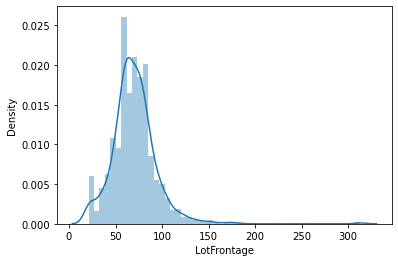

In [12]:
sns.distplot(df['LotFrontage'])    # LotFrontage: Linear feet of street connected to property

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

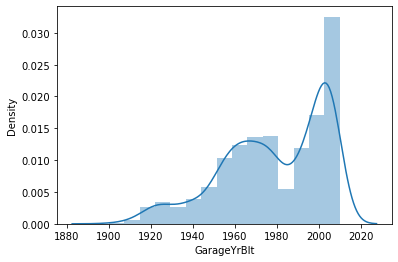

In [13]:
sns.distplot(df['GarageYrBlt'])     # Year garage was built

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

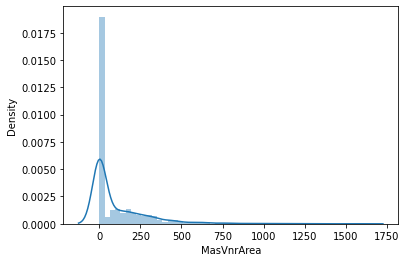

In [14]:
sns.distplot(df['MasVnrArea'])  # Masonry veneer area in square feet

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

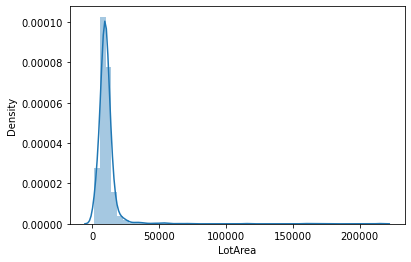

In [15]:
sns.distplot(df['LotArea'])       # LotArea: Lot size in square feet

In [16]:
df['MSSubClass'].astype('category').value_counts() # MSSubClass: Identifies the type of dwelling involved in the sale.

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [17]:
df['MiscFeature'].astype('category').value_counts() #MiscFeature:Miscellaneous feature not cov

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

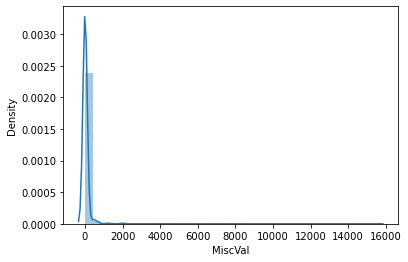

In [18]:
sns.distplot(df['MiscVal'])   # MiscVal: Value of miscellaneous feature

In [19]:
df['PoolQC'].astype('category').value_counts()      # PoolQC: Pool quality

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [20]:
df['YearBuilt'].astype('category').value_counts()   # YearBuilt: Original construction date

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1904     1
1898     1
1893     1
1882     1
2010     1
Name: YearBuilt, Length: 112, dtype: int64

In [21]:
df['YrSold'].astype('category').value_counts()      # YrSold: Year Sold (YYYY)

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

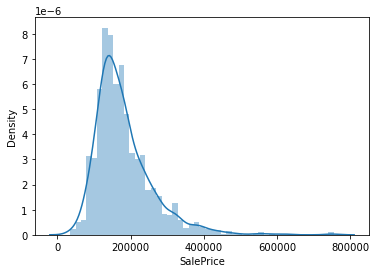

In [22]:
sns.distplot(df['SalePrice'])      # target variable: Sale Price

## Data Cleaning

In [23]:
df = df.drop_duplicates()    # Removing duplicate values from dataframe if exist

In [24]:
df.shape      # checking the shape of dataframe after dropping duplicate values or row from dataframe

(1460, 81)

In [25]:
df.drop(['Id'], axis=1, inplace=True)     # Removing index field

In [26]:
print(((df.isnull().sum()/df.shape[0])*100).round(2))  # checking null value percentage

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

From above execution we can acknowledge that there are columns which has more than 30% of missing values in their rows and so, inorder to lessen the complication we should drop them. The rows which has more than 30% of missing values are:
- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeature

In [27]:
# dropping columns which has more than 30% of missing values
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],  axis=1, inplace=True) 

In [28]:
df.shape   # checking the shape of dataframe after dropping 5 columns which has more than 30% of missing values

(1460, 75)

In [29]:
((df.isnull().sum()/df.shape[0])*100).round(2)  # checking null value percentage after dropping some columns

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

In [30]:
# Analysing columns which still have missing value percentage

print(df['LotFrontage'].describe(), end='\n\n')     # 17.74% 
print(df['MasVnrType'].describe(), end='\n\n')      # 0.55% 
print(df['MasVnrArea'].describe(), end='\n\n')      # 0.55% 
print(df['BsmtQual'].describe(), end='\n\n')        # 2.53% 
print(df['BsmtCond'].describe(), end='\n\n')        # 2.53% 
print(df['BsmtExposure'].describe(), end='\n\n')    # 2.60% 
print(df['BsmtFinType1'].describe(), end='\n\n')    # 2.53% 
print(df['BsmtFinType2'].describe(), end='\n\n')    # 2.60% 
print(df['Electrical'].describe(), end='\n\n')      # 0.07% 
print(df['GarageType'].describe(), end='\n\n')      # 5.55% 
print(df['GarageYrBlt'].describe(), end='\n\n')     # 5.55% 
print(df['GarageFinish'].describe(), end='\n\n')    # 5.55% 
print(df['GarageQual'].describe(), end='\n\n')      # 5.55% 
print(df['GarageCond'].describe(), end='\n\n')      # 5.55% 

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

count      1459
unique        5
top

In [31]:
# Since LotFrontage is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values
# Null values or Missing values in column GarageYrBlt and MasVnrArea is filled with median value
# Electrical column is dropped

df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["Electrical"].dropna(inplace=True)

In [32]:
((df.isnull().sum()/df.shape[0])*100).round(2)# checking missing value percentage per column after filling & grouping

MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBa

In [33]:
df.dropna(axis='rows', inplace=True) # Dropping rows with NaN values

In [34]:
df.shape        # checking the shape of dataframe after dropping rows with NaN values

(1338, 75)

In [35]:
((df.isnull().sum()/df.shape[0])*100).round(2) # checking missing value percentage per column after dropping some rows

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

In [36]:
# Converting dates to days that is the dates of columns like YearBuilt, YearRemodAdd & GarageYrBlt is converted
# These dates are converted to days inorder to create derived features

df['DiffYearBuilt'] = pd.datetime.now().year - df['YearBuilt']
df['DiffYearRemodAdd'] = pd.datetime.now().year - df['YearRemodAdd']
df['DiffGarageYrBlt'] = pd.datetime.now().year - df['GarageYrBlt']

In [37]:
# To analyse numerical and categorical fields separately using the provided Data Dictionary

target_value = 'SalePrice'
numerical_columns = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                     'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                     'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                     'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd','DiffGarageYrBlt']
print(len(numerical_columns))

categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                       'BsmtFinType1', 'BsmtFinType2', 'Heating','HeatingQC', 'CentralAir', 'Electrical', 
                       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
print(len(categorical_columns))

31
43


In [38]:
# For each categorical columns distinct variables are listed to lessen address issues if exist
for col in categorical_columns:  
    print(col,' : ',df[col].unique()) 

MSSubClass  :  [ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  2]
OverallCond  :  [5 8 6 7 4 3 9 2]
R

In [39]:
df.shape      # checking the shape of dataframe after cleaning the dataset

(1338, 78)

### Observation:
- After cleaning the data there are 1338 rows and 78 columns
- Seperated numerical and categorical columns to analyse them 
- listed distinct variables for each categorical columns to lessen address issues

## Exploratory Data Analysis

In [40]:
def categorical_column_analysis(i, col_i,col_o): # Created a Function for Analysis of Categorical column
    plt.figure(i)
    variables = df[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=df[[col_i,col_o]], order=my_order.index)

In [41]:
def numerical_column_analysis(i, col_i,col_o): # Created a Function for Analysis of Numerical column
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=df[[col_i,col_o]])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Timber'),
  Text(16, 0, 'Gilbert'),
  Text(17, 0, 'StoneBr'),
  Text(18, 0, 'ClearCr'),
  Text(19, 0, 'Edwards'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

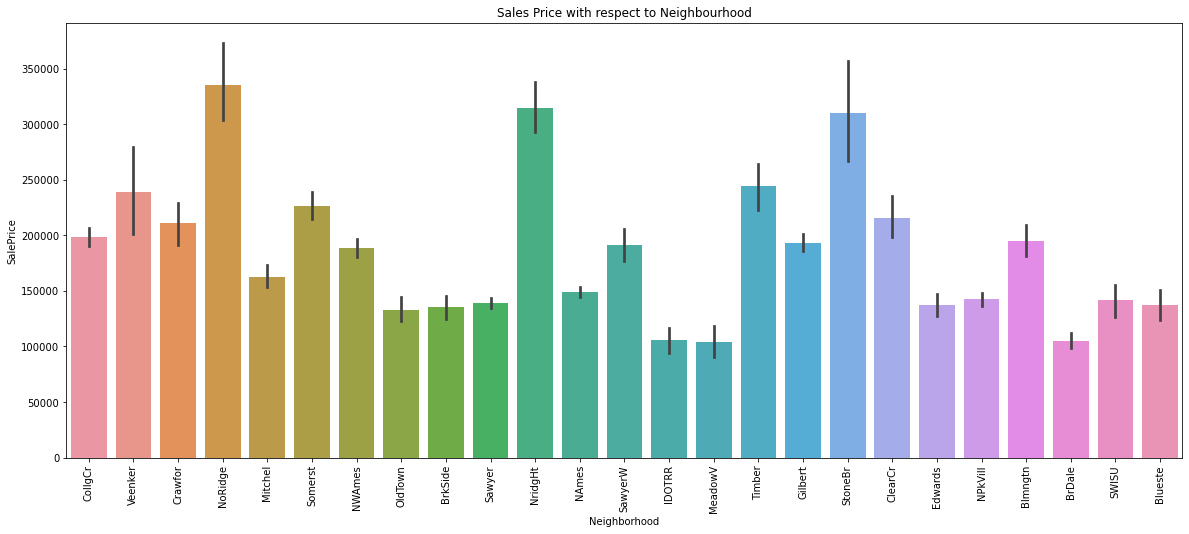

In [42]:
plt.figure(figsize=(20, 8))    # plotting sns barplot 'Sale Price' with respect to 'Neighborhood'
sns.barplot(x = "Neighborhood", y = "SalePrice", data = df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9')])

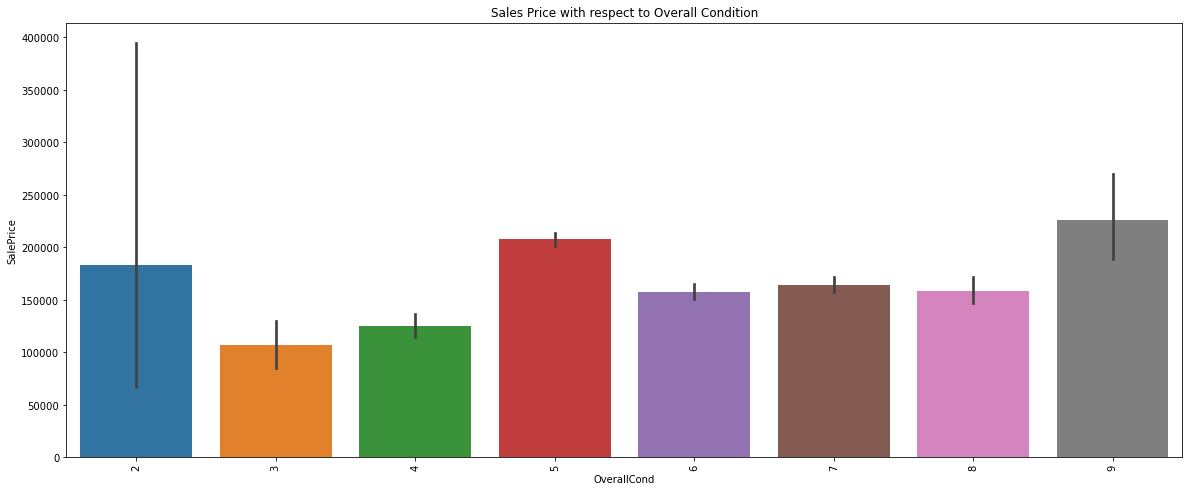

In [43]:
plt.figure(figsize=(20, 8))    # plotting sns barplot 'overall condition' with respect to 'Saleprice'
sns.barplot(x = "OverallCond", y = "SalePrice", data = df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

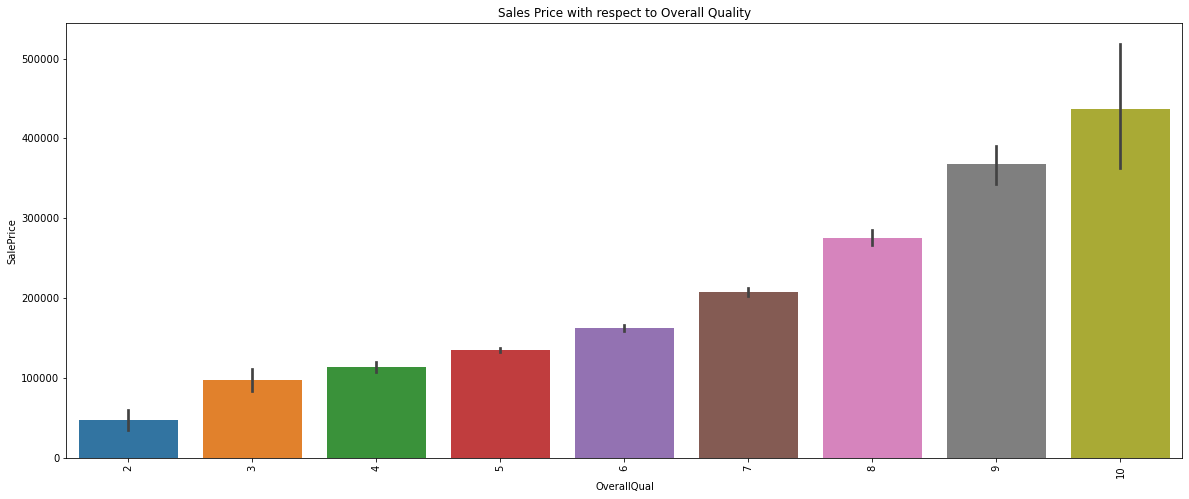

In [44]:
plt.figure(figsize=(20, 8))  # plotting sns barplot 'overall quality' with respect to 'Saleprice'
sns.barplot(x = "OverallQual", y = "SalePrice", data = df)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

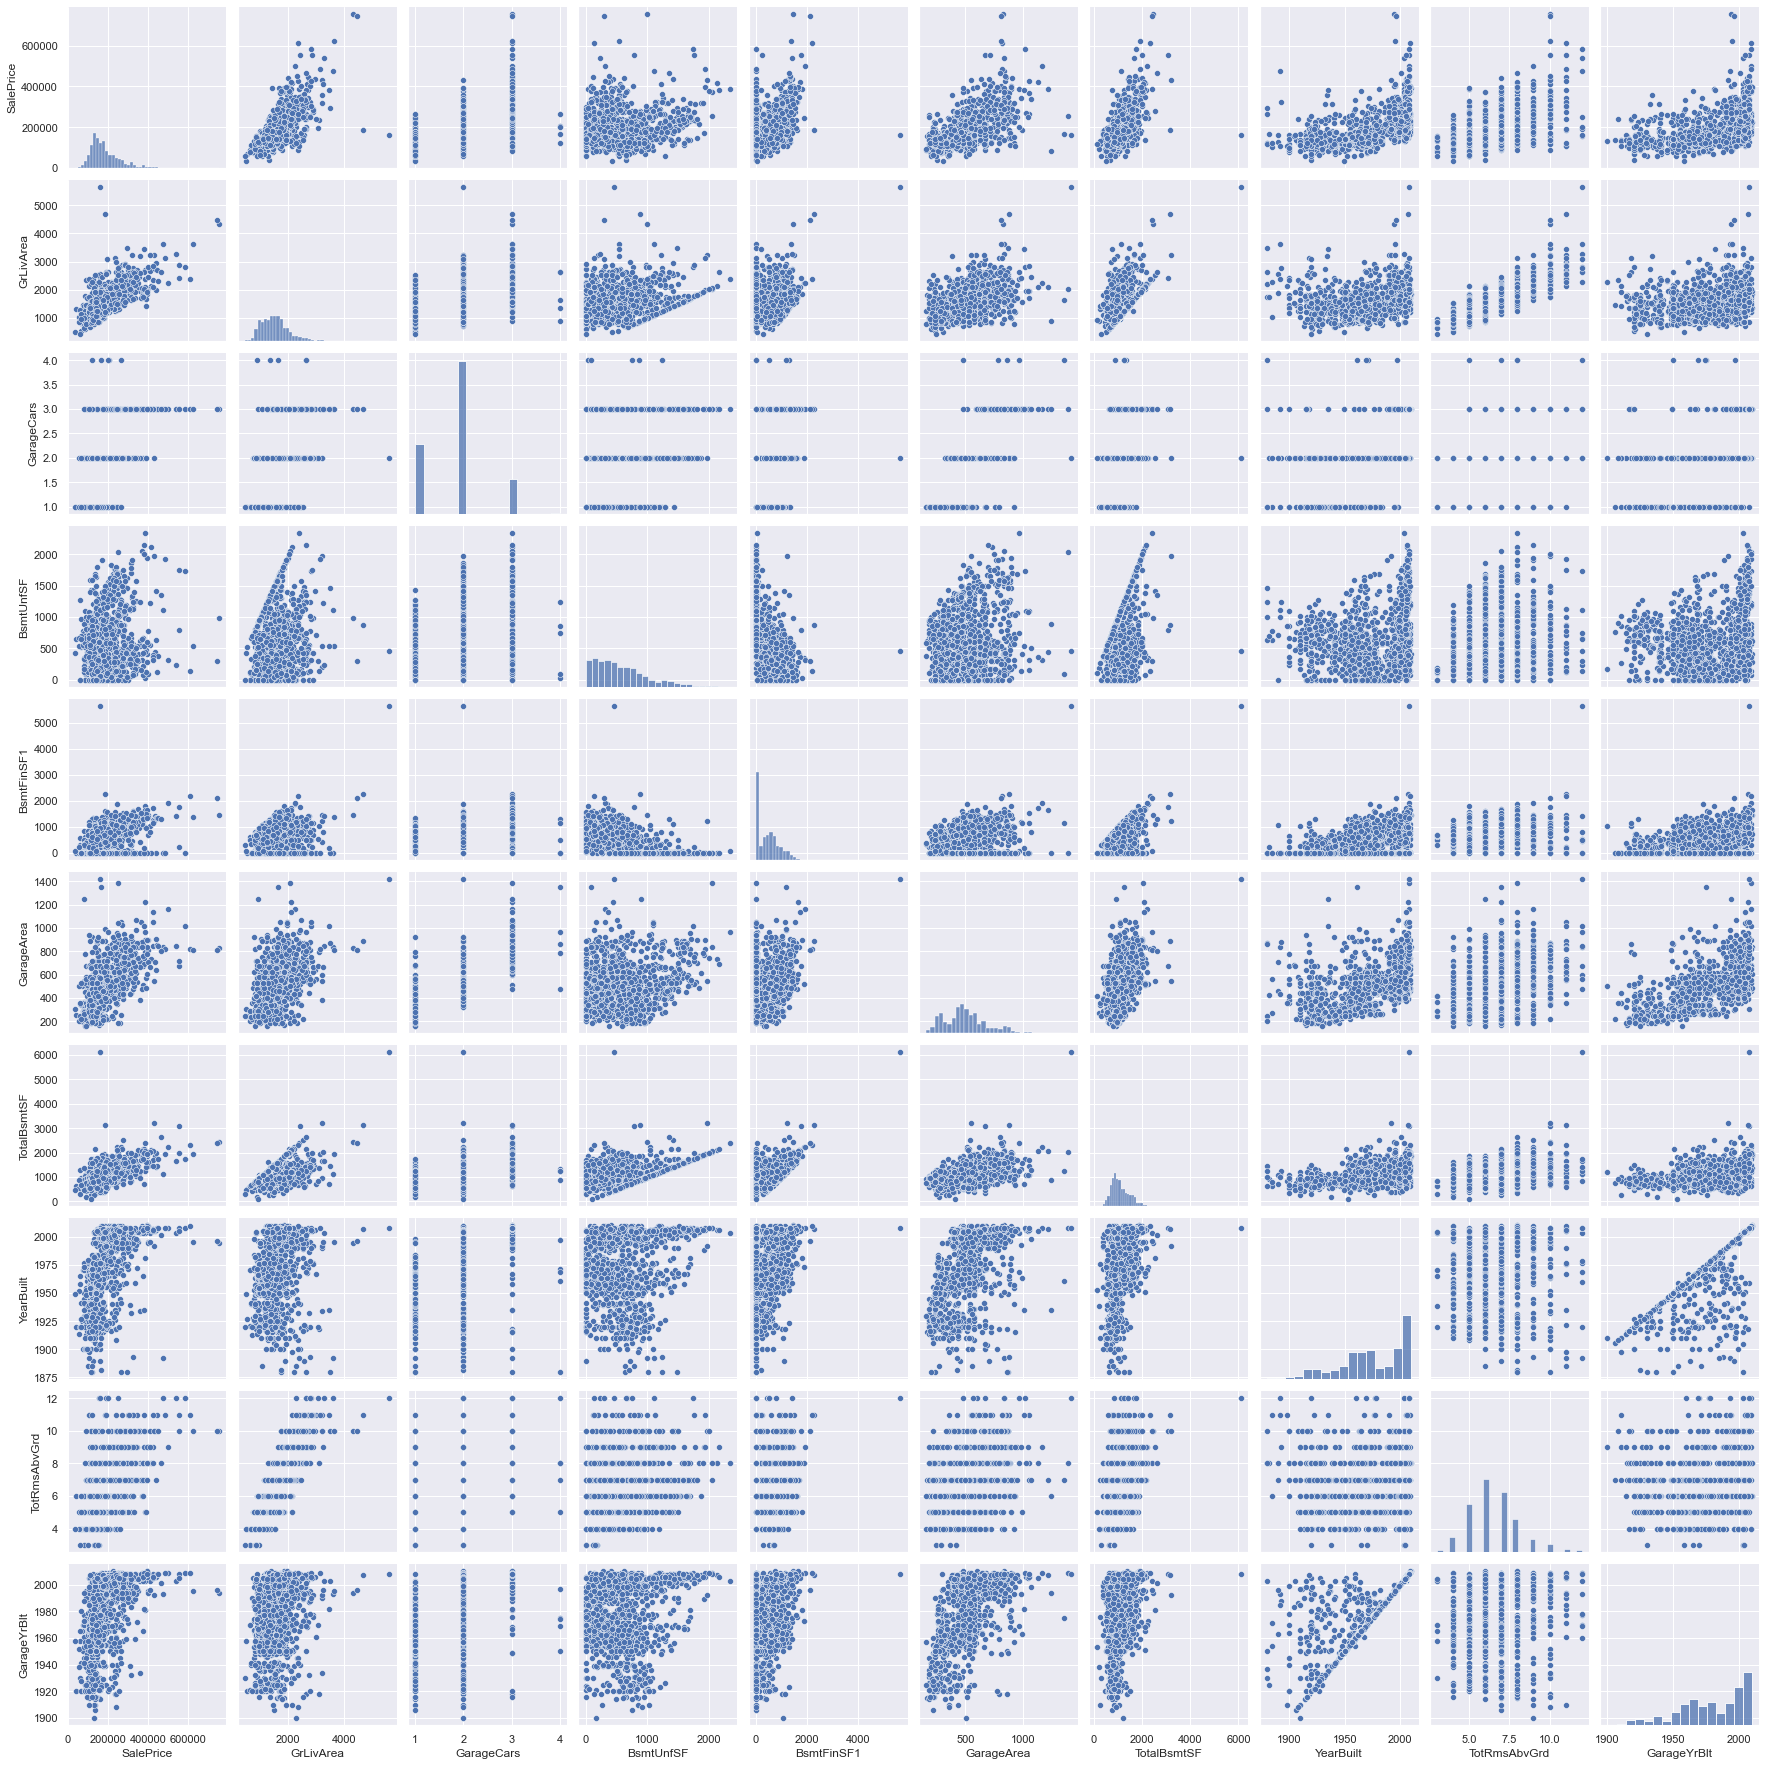

In [45]:
sns.set()   # Checking the same with a pairplot
col = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 
        'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[col], size = 2.5)
plt.show()

<Figure size 432x288 with 0 Axes>

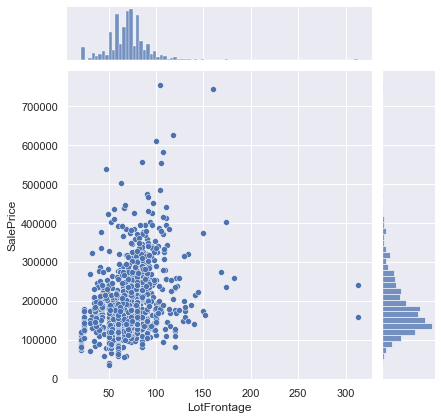

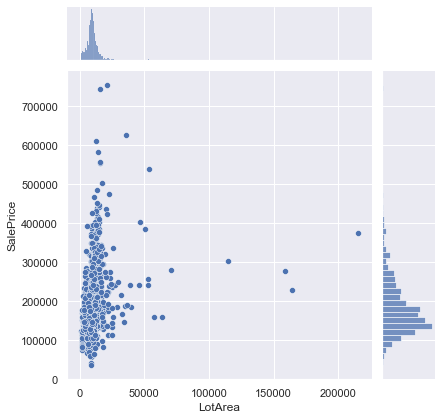

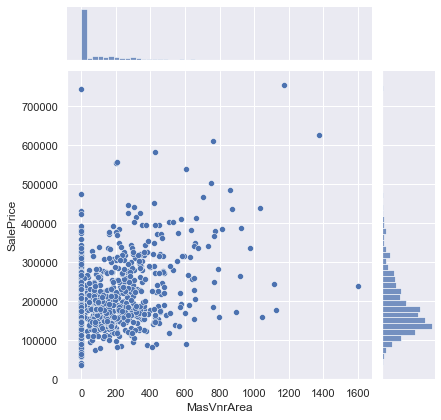

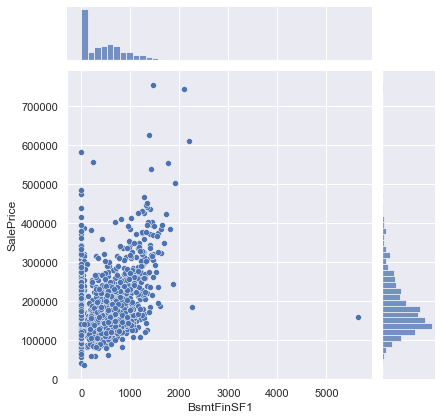

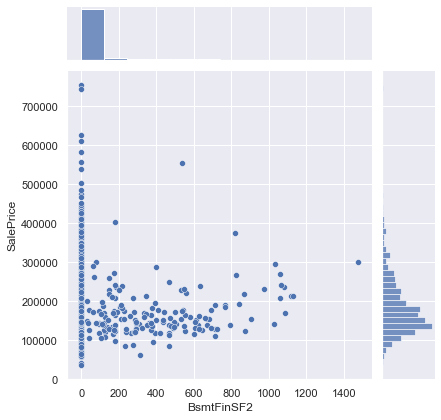

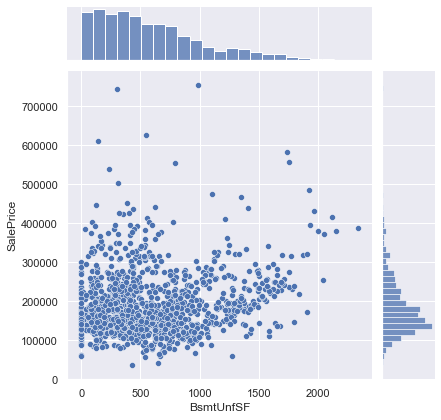

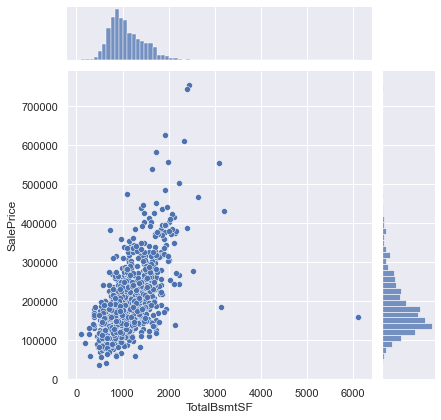

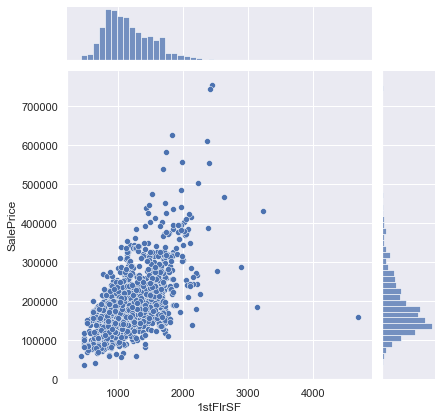

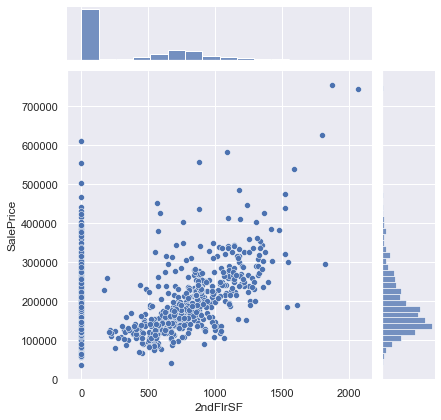

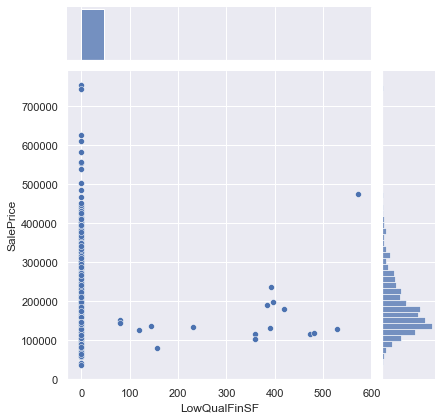

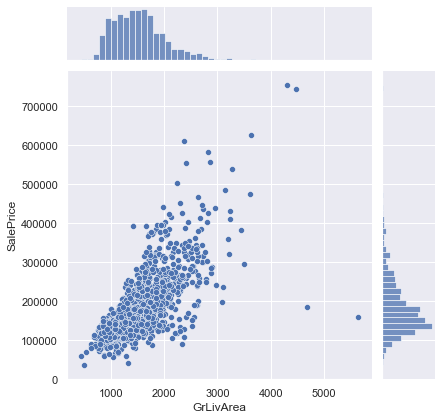

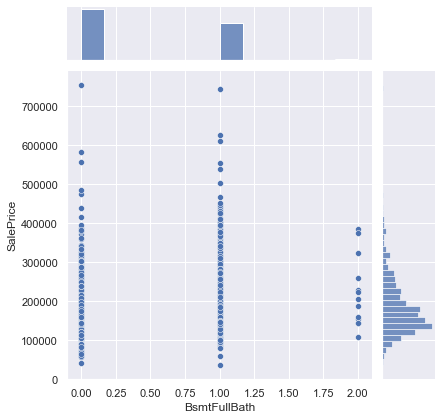

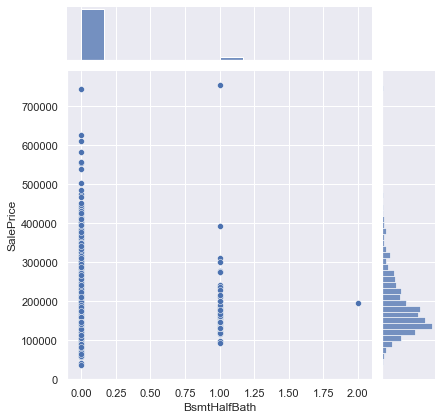

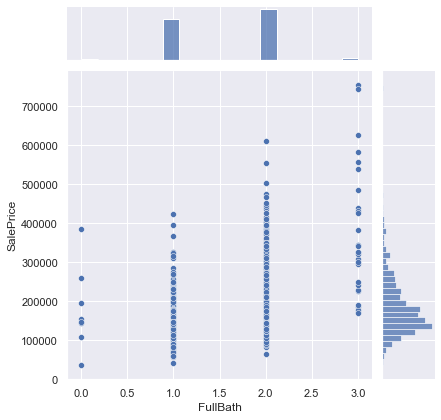

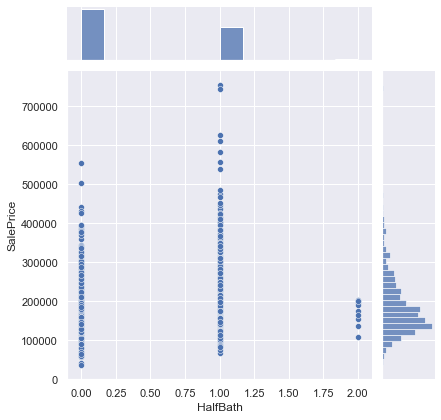

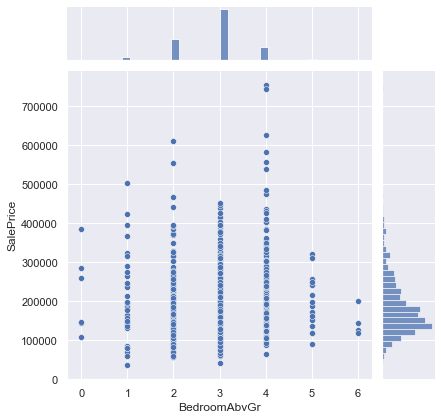

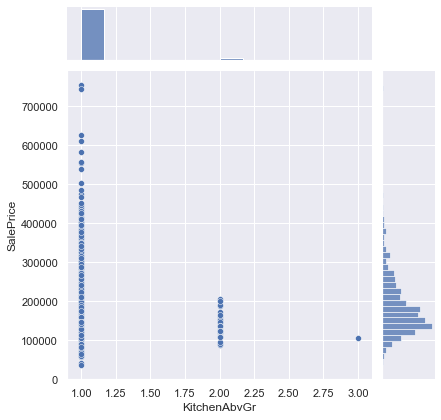

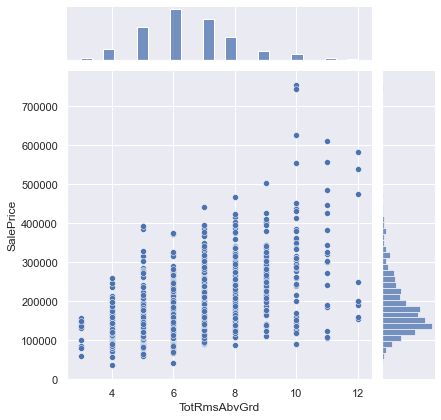

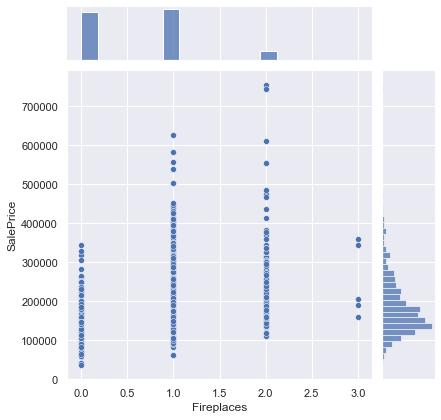

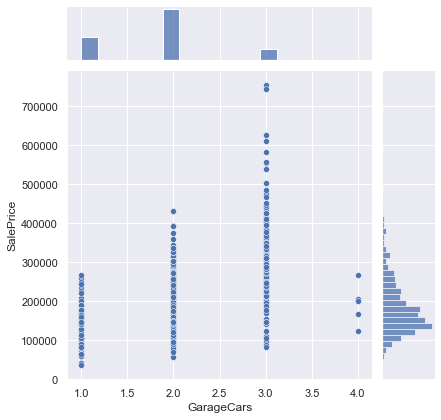

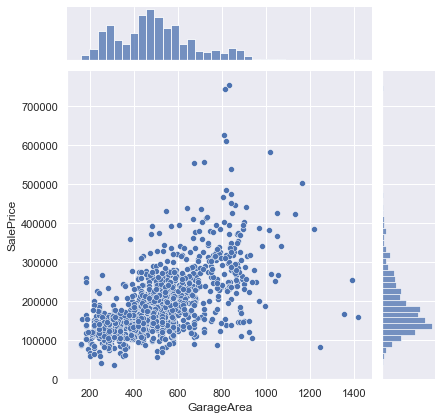

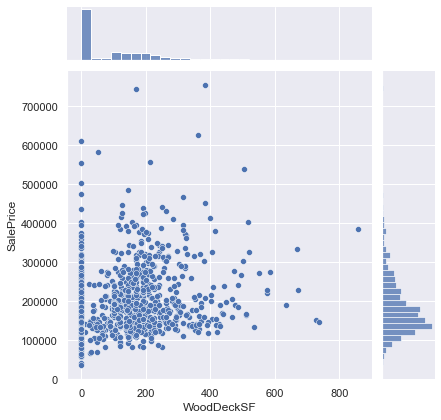

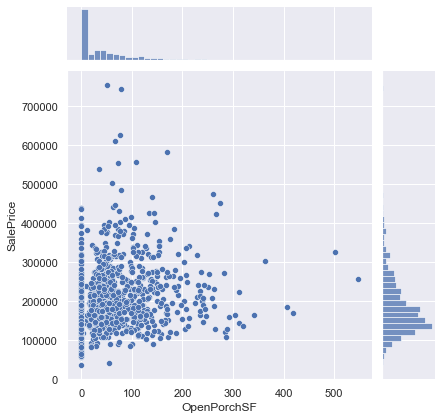

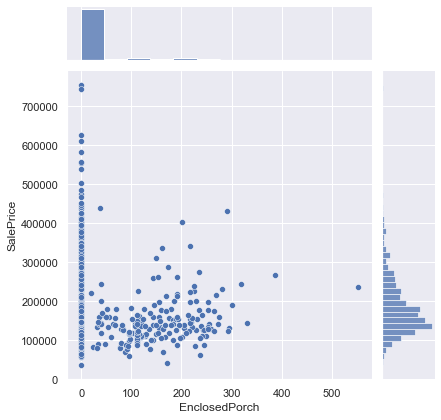

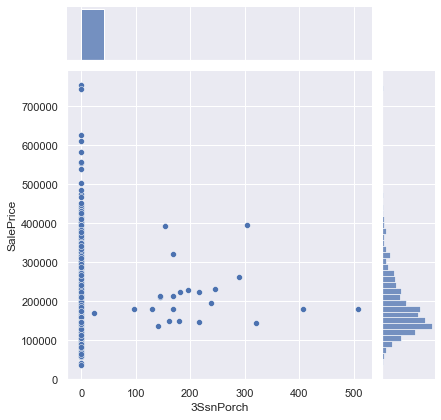

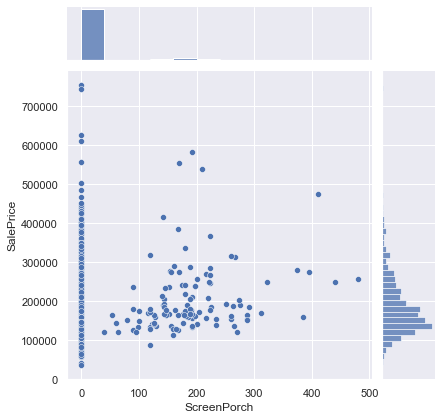

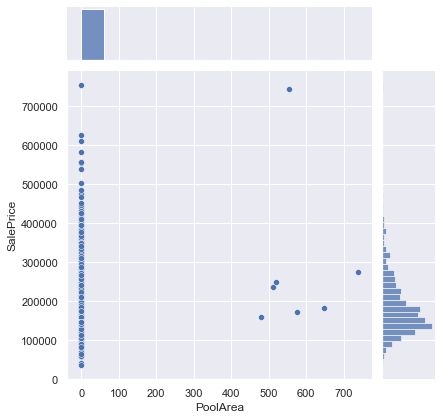

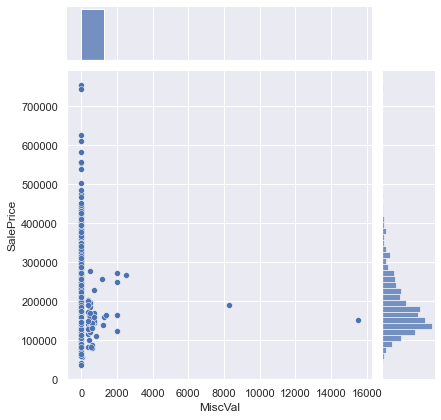

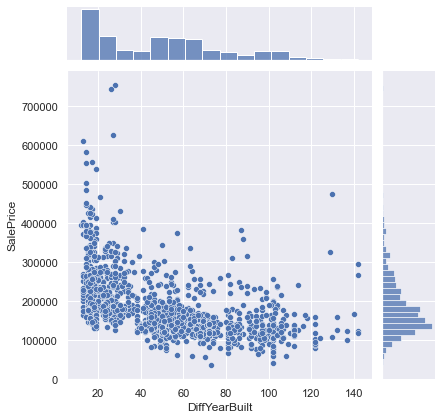

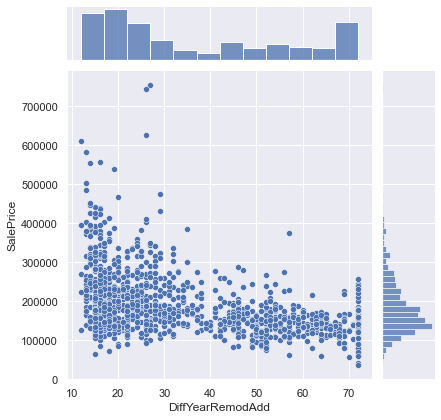

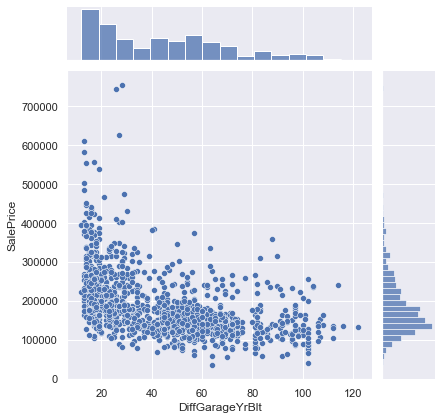

In [46]:
for i, col in enumerate(numerical_columns):   # Numerical Column Analysis
    numerical_column_analysis(i, col, target_value)

<Figure size 432x288 with 0 Axes>

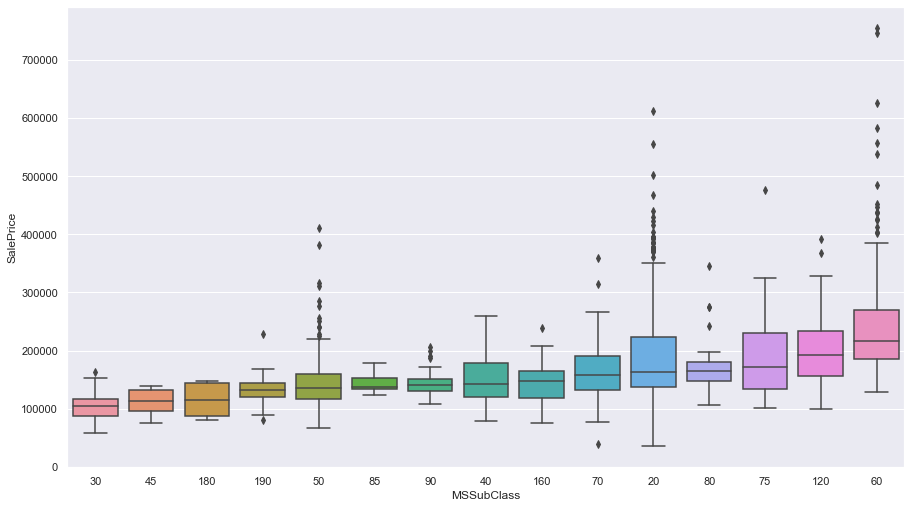

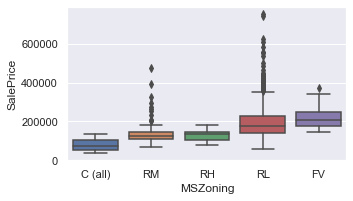

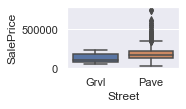

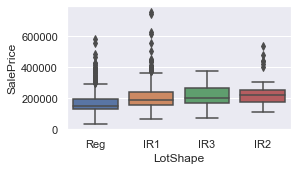

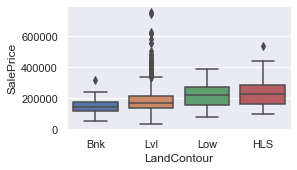

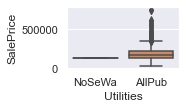

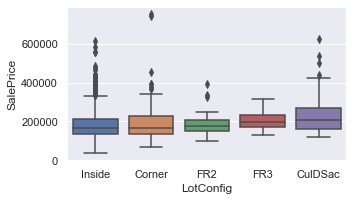

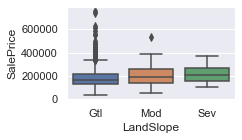

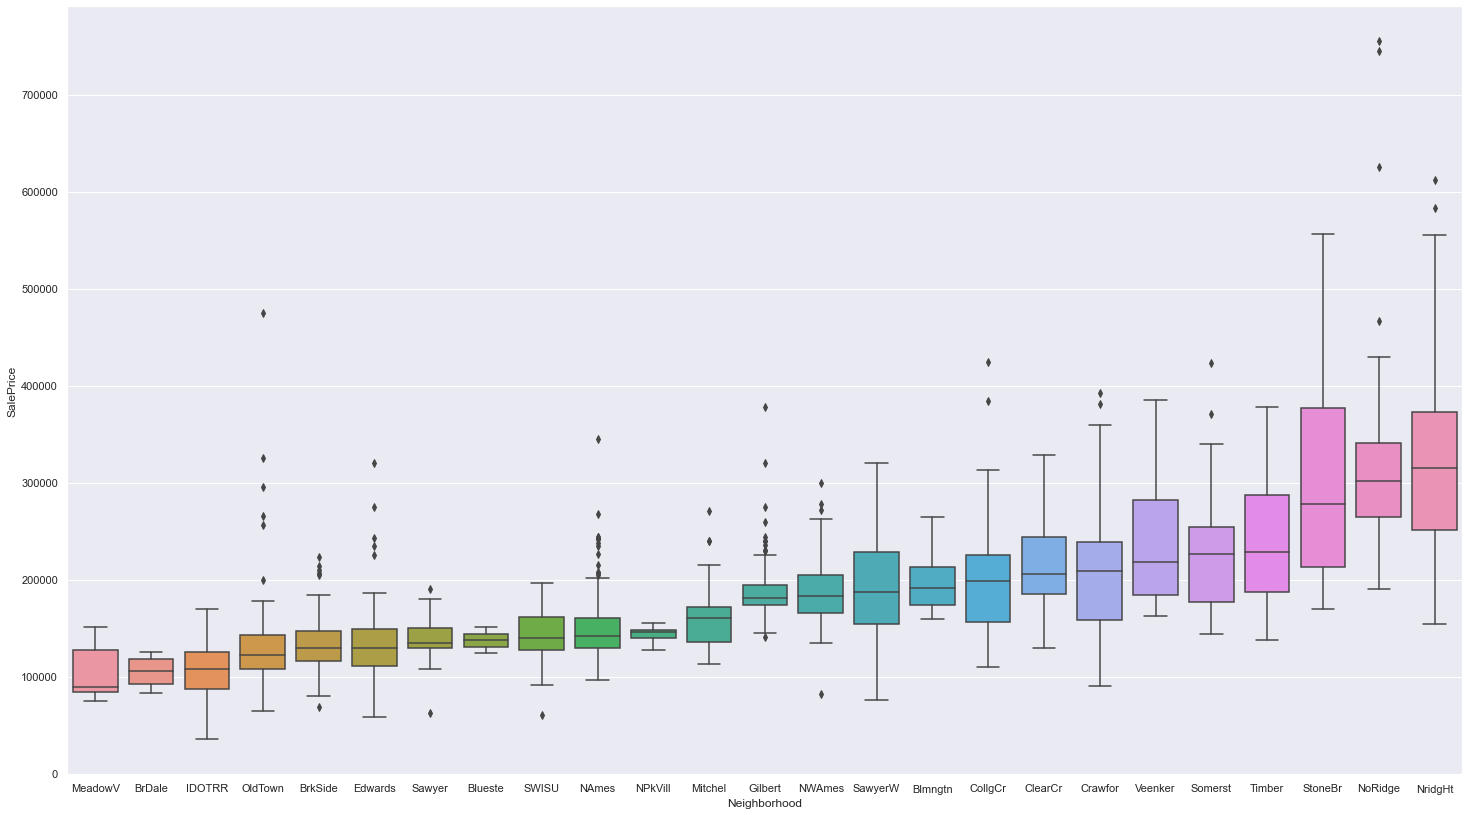

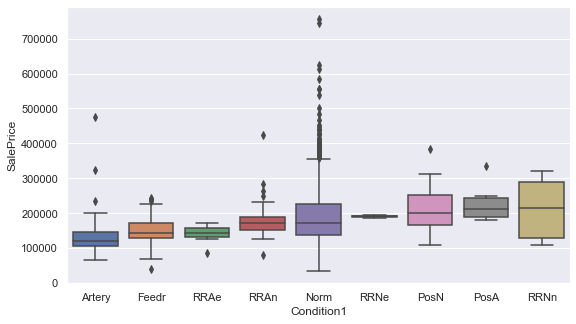

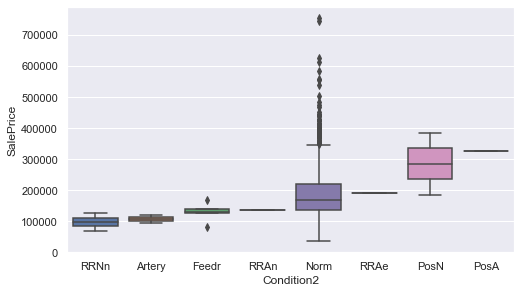

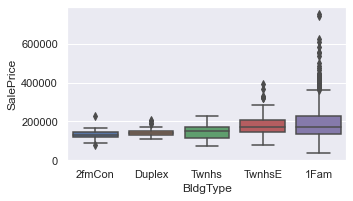

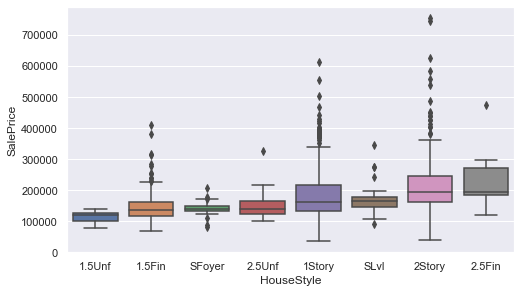

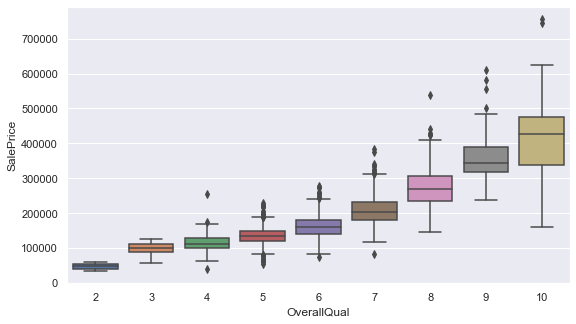

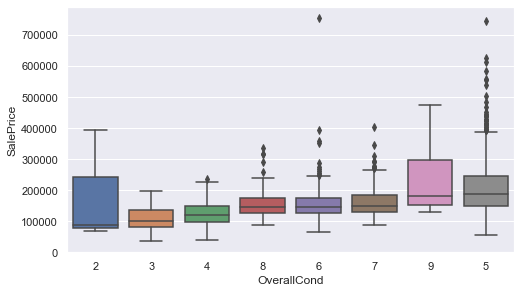

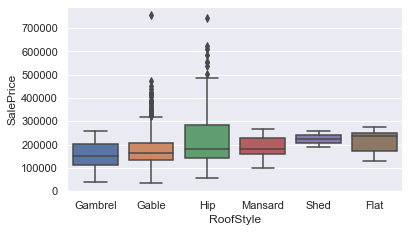

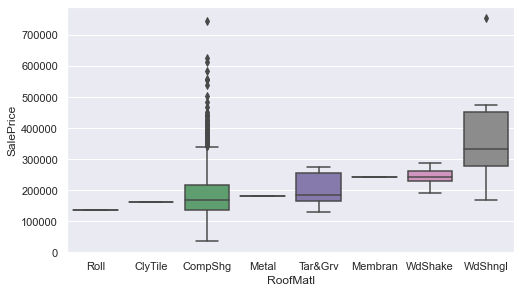

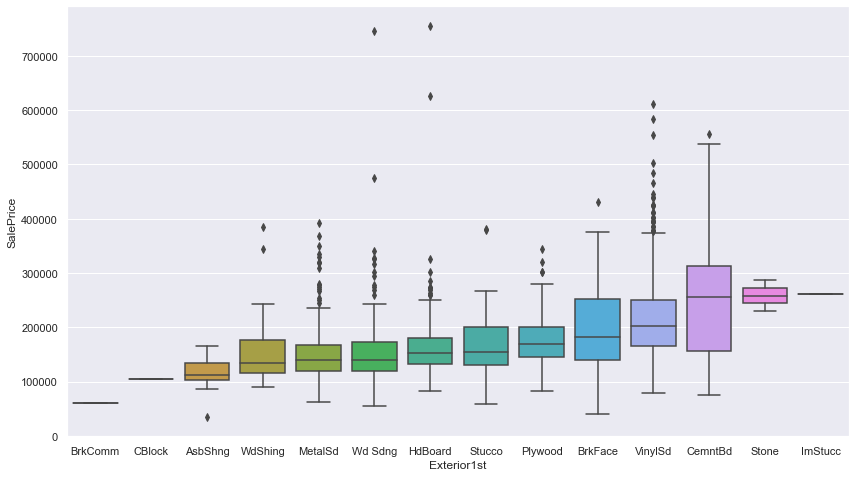

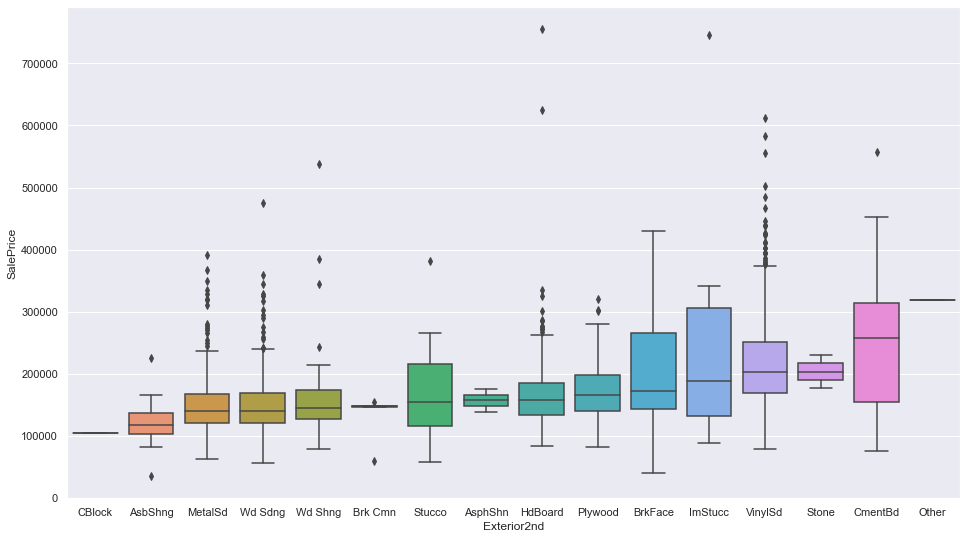

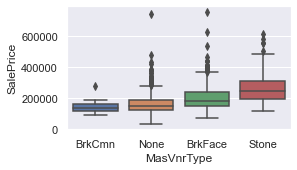

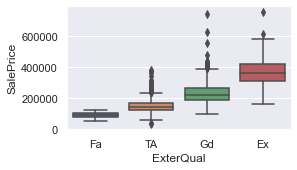

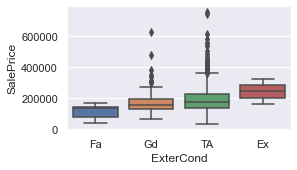

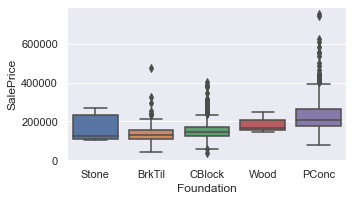

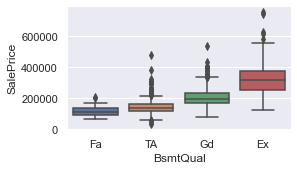

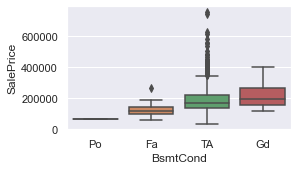

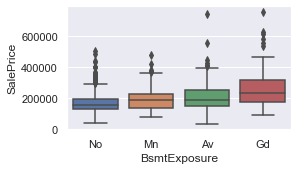

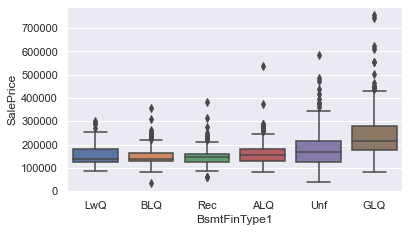

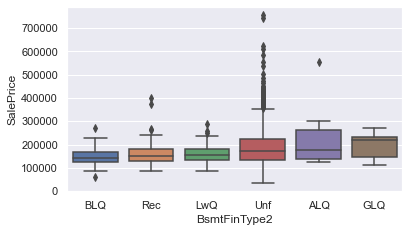

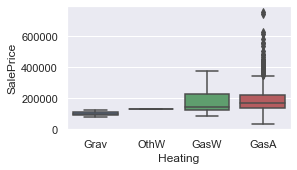

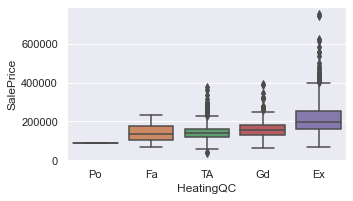

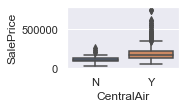

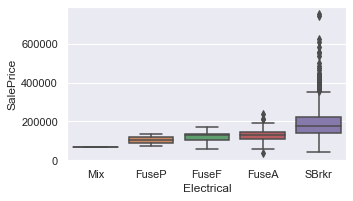

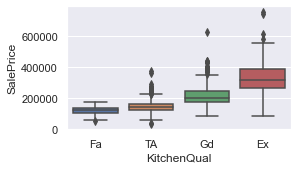

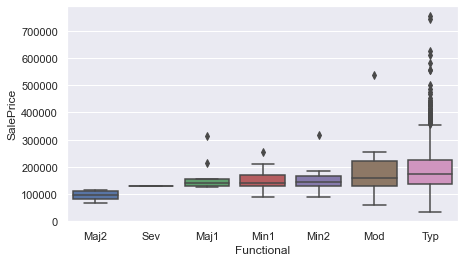

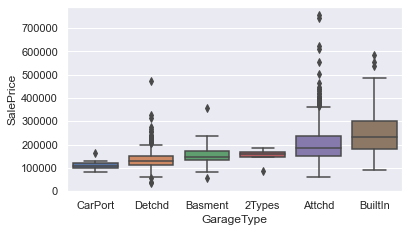

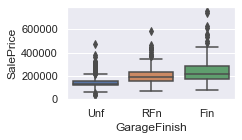

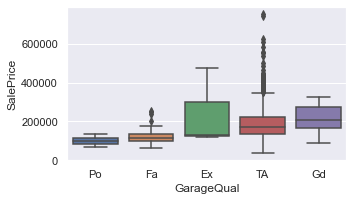

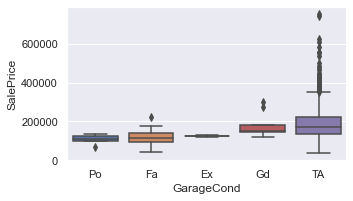

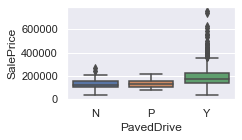

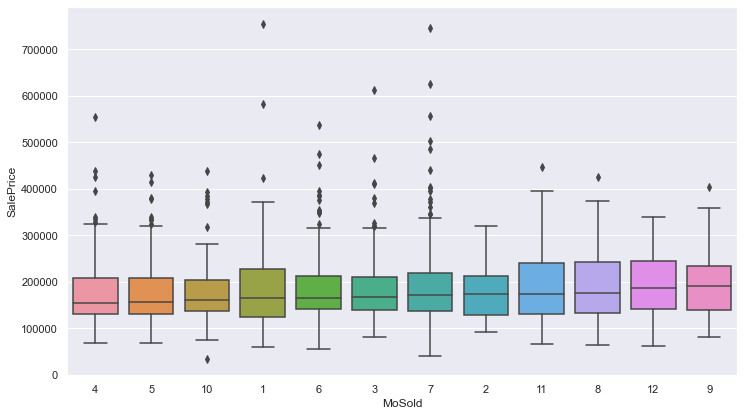

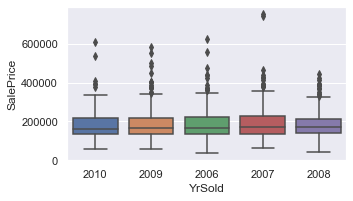

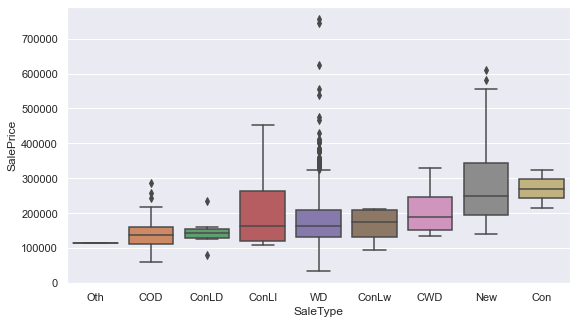

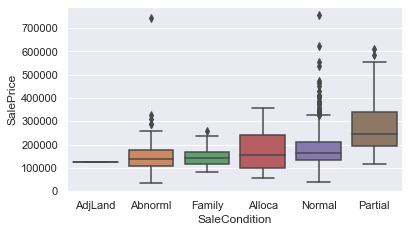

In [47]:
for i, col in enumerate(categorical_columns):   # Categorical column analysis
    categorical_column_analysis(i, col, target_value)

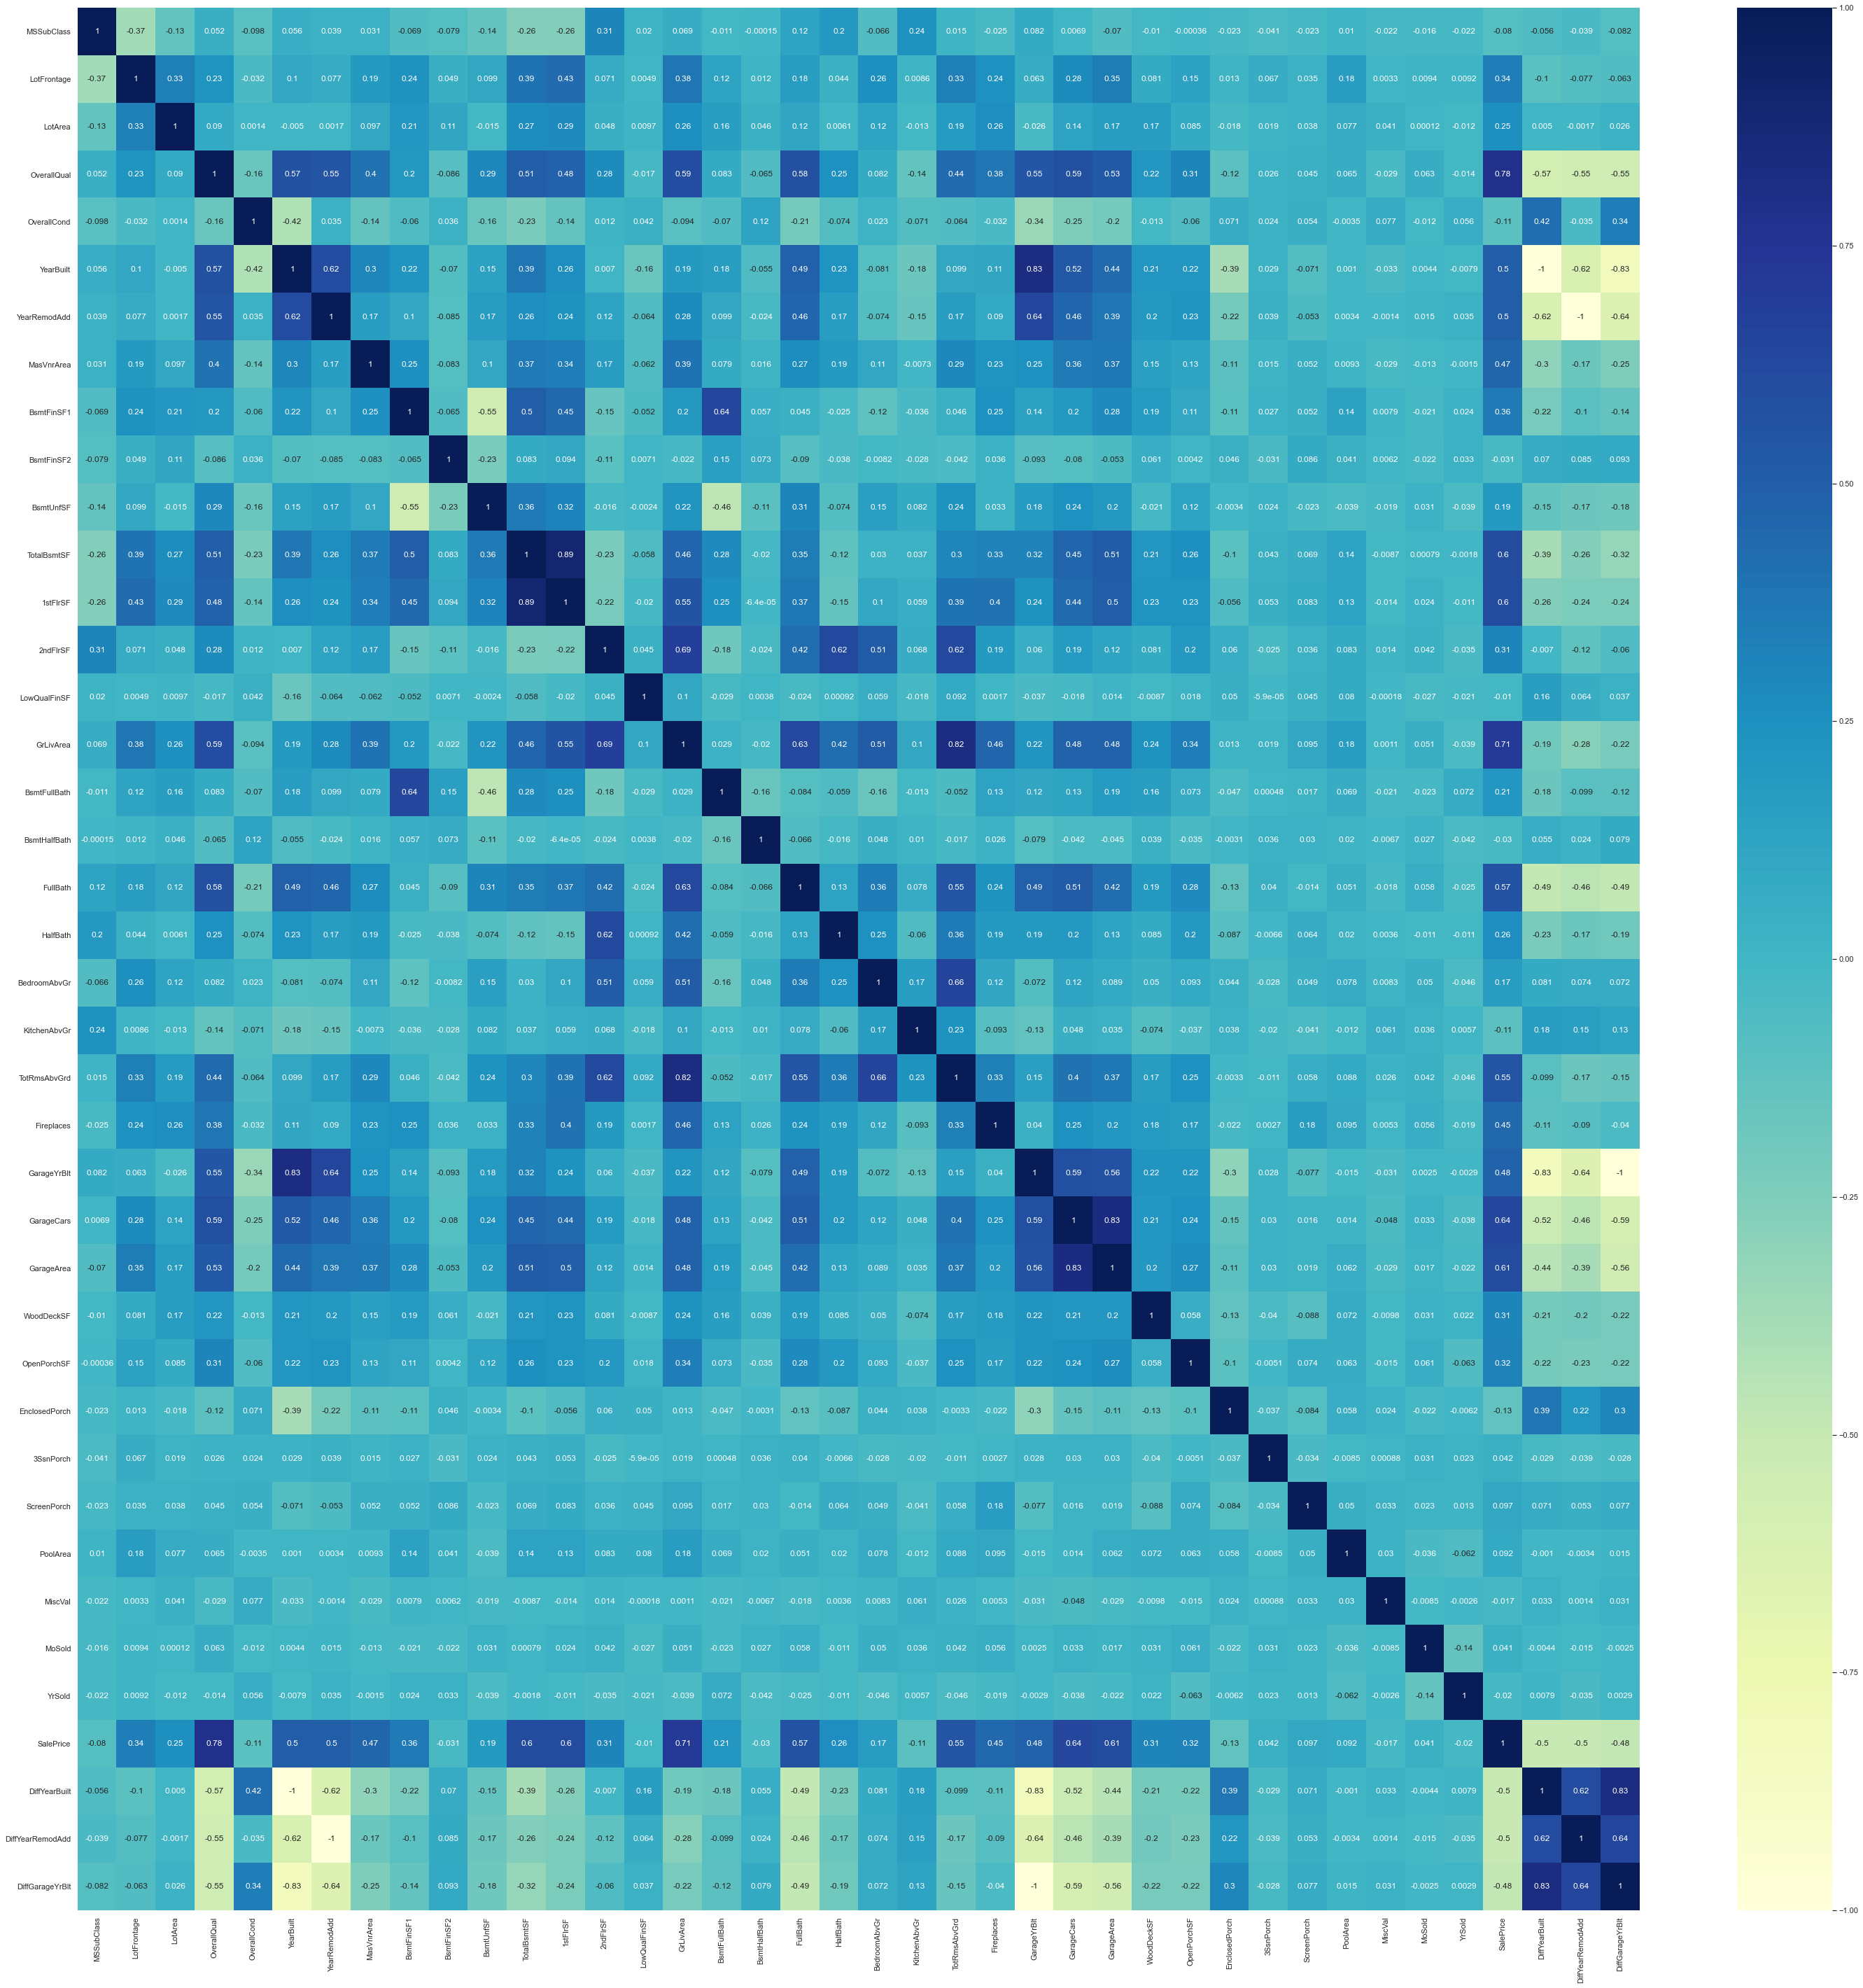

In [48]:
plt.figure(figsize=(50,50))  # plotting correlations on a heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Observation:
- From exploratory data analysis it is acknowledged that 
    - There are some linear relationship between various columns & output column 
    - There is a collinearity in data.

In [49]:
for col in categorical_columns: # all columns are dummified using loop
    dummy = pd.get_dummies(df[col], drop_first = True) # Using drop_first dropped the first column from dummy df
    dummy = dummy.add_prefix(f'{col}_')
    df = pd.concat([df, dummy], axis = 1)
    df.drop([col], axis = 1, inplace = True)
df.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0           0        150          856       856  ...               0   
1           0        284         1262      1262  ...               0   
2           0        434          920       920  ...               0   
3           0        540          756       961  ...               0   
4           0        490         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 270 columns]

## Data Preparation

In [50]:
from scipy import stats     # Checking if outliers exist
a = np.abs(stats.zscore(df[numerical_columns]))
selected = df[numerical_columns][(a < 3).all(axis=1)]    # Records removed by outliers
df = df.loc[selected.index]

In [51]:
df

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0            65.0     8450       2003          2003       196.0         706   
2            68.0    11250       2001          2002       162.0         486   
4            84.0    14260       2000          2000       350.0         655   
6            75.0    10084       2004          2005       186.0        1369   
10           70.0    11200       1965          1965         0.0         906   
...           ...      ...        ...           ...         ...         ...   
1451         78.0     9262       2008          2009       194.0           0   
1452         35.0     3675       2005          2005        80.0         547   
1454         62.0     7500       2004          2005         0.0         410   
1455         62.0     7917       1999          2000         0.0           0   
1456         85.0    13175       1978          1988       119.0         790   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0              0        150          856       856  ...               0   
2              0        434          920       920  ...               0   
4              0        490         1145      1145  ...               0   
6              0        317         1686      1694  ...               0   
10             0        134         1040      1040  ...               0   
...          ...        ...          ...       ...  ...             ...   
1451           0       1573         1573      1578  ...               0   
1452           0          0          547      1072  ...               0   
1454           0        811         1221      1221  ...               0   
1455           0        953          953       953  ...               0   
1456         163        589         1542      2073  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
2                  0             0             0            1   
4                  0             0             0            1   
6                  0             0             0            1   
10                 0             0             0            1   
...              ...           ...           ...          ...   
1451               0             1             0            0   
1452               0             0             0            1   
1454               0             0             0            1   
1455               0             0             0            1   
1456               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
2                         0                     0                     0   
4                         0                     0                     0   
6                         0                     0                     0   
10                        0                     0                     0   
...                     ...                   ...                   ...   
1451                      0                     0                     0   
1452                      0                     0                     0   
1454                      0                     0                     0   
1455                      0                     0                     0   
1456                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
2                        1                      0  
4                        1                      0  
6                        1                      0  
10                       1                      0  
...                    ...                    ...  
1451                     0                      1  
1452                     1                      0  
1454  

In [52]:
y = df.loc[:, target_value]
X = df.loc[:, df.columns != target_value]
scaler = StandardScaler()
scaler.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

## Model Building and Evaluation

### Simple Linear Regression

In [53]:
lr = LinearRegression()   # loaded linear regression model
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train) # predicting y_train 
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
train_mse = mean_squared_error(y_train,y_train_pred)
train_rmse = np.sqrt(train_mse)
print("Train R2:", train_r2)
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)

y_test_pred = lr.predict(X_test) # predicting y_test
test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
test_mse = mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(test_mse)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
linear = ['linear_regression',train_r2,test_r2,train_mse,test_mse,train_rmse,test_rmse]

Train R2: 0.9494886959071344
Train MSE: 221096258.1791329
Train RMSE: 14869.30590777972
Test R2: 0.8951614037992079
Test MSE: 458851076.5862859
Test RMSE: 21420.809428830784


In [54]:
linear_df = pd.DataFrame({'Features':X_train.columns, 'linear_Coefficient':lr.coef_.round(4)})
linear_df.reset_index(drop=True, inplace=True) # Features and coefficients are put in a dataframe
linear_df

Features  linear_Coefficient
0              LotFrontage             -7.4690
1                  LotArea              1.8226
2                YearBuilt            252.1711
3             YearRemodAdd             32.2483
4               MasVnrArea             -6.7166
..                     ...                 ...
264  SaleCondition_AdjLand          46458.1591
265   SaleCondition_Alloca         -48120.0229
266   SaleCondition_Family           1419.1910
267   SaleCondition_Normal           8557.7286
268  SaleCondition_Partial          36994.6811

[269 rows x 2 columns]

In [55]:
model_parameters = list(lr.coef_) # Model parameters of simple linear regrssion 
model_parameters.insert(0, lr.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-299337.624, 'constant'),
 (52122.668, 'SaleType_CWD'),
 (-48120.023, 'SaleCondition_Alloca'),
 (-47128.015, 'OverallQual_3'),
 (46458.159, 'SaleCondition_AdjLand'),
 (-43639.058, 'GarageQual_Po'),
 (-40180.447, 'OverallQual_4'),
 (-40157.656, 'Condition1_PosA'),
 (-39347.13, 'Functional_Mod'),
 (-37279.532, 'BsmtFinType2_GLQ'),
 (36994.681, 'SaleCondition_Partial'),
 (-32478.657, 'OverallQual_6'),
 (-31857.988, 'OverallQual_5'),
 (31127.61, 'Neighborhood_StoneBr'),
 (-29168.631, 'Neighborhood_ClearCr'),
 (-28621.994, 'OverallQual_7'),
 (27484.021, 'Electrical_FuseP'),
 (-27114.107, 'Neighborhood_NWAmes'),
 (-27021.34, 'BldgType_Twnhs'),
 (-26456.747, 'BldgType_TwnhsE'),
 (-25628.725, 'Neighborhood_NAmes'),
 (-25556.244, 'Neighborhood_MeadowV'),
 (-23445.189, 'LotShape_IR3'),
 (-23156.124, 'Neighborhood_Edwards'),
 (-22546.563, 'Exterior1st_BrkComm'),
 (-21880.155, 'Neighborhood_Somerst'),
 (21842.488, 'Foundation_Wood'),
 (-20959.717, 'Neighborhood_Timber'),
 (20727.967, 'HouseStyle

### Lasso Regression

In [56]:
lasso = Lasso() # loaded lasso regression model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                     4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]} # list of alphas to tune
folds = 5
model_cv = GridSearchCV(estimator = lasso,       # cross validation
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
cv_results = pd.DataFrame(model_cv.cv_results_) # creating a table to acknowledge the cv results of lasso regression
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.082201      0.005686         0.003274        0.000479      0.0001   
1       0.088357      0.005821         0.003573        0.000180       0.001   
2       0.085032      0.003223         0.003482        0.000383        0.01   
3       0.086079      0.003168         0.003403        0.000451        0.05   
4       0.087002      0.005227         0.003692        0.000141         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -17092.695952      -18005.829748      -18481.682456   
1   {'alpha': 0.001}      -17088.287867      -18001.588705      -18478.443492   
2    {'alpha': 0.01}      -17062.043588      -17959.036875      -18443.598336   
3    {'alpha': 0.05}      -17012.637159      -17827.483514      -18404.108820   
4     {'alpha': 0.1}      -16994.886157      -17803.181375      -18380.186103   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -16683.974231  ...    -17335.505646      787.004970               27   
1      -16683.474989  ...    -17331.567534      787.408172               26   
2      -16687.716168  ...    -17296.453983      789.270708               25   
3      -16440.722567  ...    -17169.552494      839.803270               24   
4      -16219.069026  ...    -17108.957098      874.911963               23   

   split0_train_score  split1_train_score  split2_train_score  \
0        -9509.438845        -9460.401473        -9580.925775   
1        -9509.413169        -9460.405768        -9580.917865   
2        -9509.290257        -9460.506242        -9580.878428   
3        -9508.773814        -9460.928640        -9580.516856   
4        -9508.194862        -9461.558702        -9580.143016   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0        -9861.210269        -9273.000125      -9536.995298       191.501780  
1        -9861.206415        -9272.998045      -9536.988252       191.501081  
2        -9861.204698        -9273.159721      -9537.007869       191.449638  
3        -9861.397485        -9273.972318      -9537.117822       191.256115  
4        -9861.694383        -9274.993770      -9537.316946       191.026516  

[5 rows x 21 columns]

In [58]:
model_cv.best_estimator_  # getting the best alpha value of lasso regression

Lasso(alpha=100)

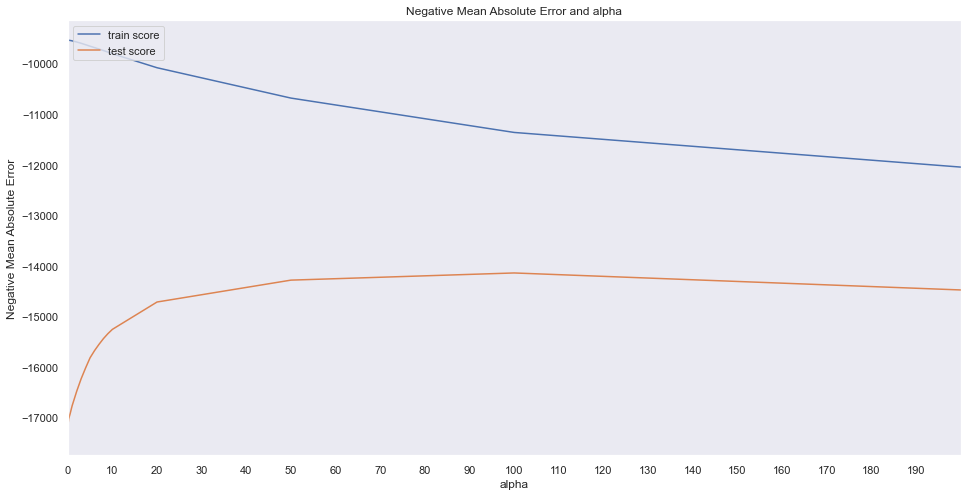

In [59]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
# mean test and train scoes with alpha are plotted

plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [60]:
alpha =100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

y_train_pred = lasso.predict(X_train)   # predicting  y_train
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
train_mse = mean_squared_error(y_train,y_train_pred)
train_rmse = np.sqrt(train_mse)
print("Train R2:", train_r2)
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)

y_test_pred_lasso = lasso.predict(X_test)  # predicting y_test
test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso)
test_mse = mean_squared_error(y_test,y_test_pred_lasso)
test_rmse = np.sqrt(test_mse)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
lasso_list = ['lasso_regression',train_r2,test_r2,train_mse,test_mse,train_rmse,test_rmse]

Train R2: 0.934521914599683
Train MSE: 286608313.4208479
Train RMSE: 16929.51013528885
Test R2: 0.9303615100887771
Test MSE: 304789430.85434407
Test RMSE: 17458.219578592318


In [61]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Lasso_Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)  # Features and coefficients are put in a dataframe
lasso_df

Features  Lasso_Coefficient
0              LotFrontage            70.9276
1                  LotArea             1.1247
2                YearBuilt           795.3451
3             YearRemodAdd           144.3747
4               MasVnrArea            -2.5187
..                     ...                ...
264  SaleCondition_AdjLand             0.0000
265   SaleCondition_Alloca         -6295.0717
266   SaleCondition_Family            -0.0000
267   SaleCondition_Normal          4981.0827
268  SaleCondition_Partial         20007.4718

[269 rows x 2 columns]

In [62]:
model_parameters = list(lasso.coef_)  # model parameters of lasso regression
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1713810.724, 'constant'),
 (46211.422, 'OverallQual_9'),
 (35321.123, 'Neighborhood_StoneBr'),
 (27078.359, 'Neighborhood_Crawfor'),
 (22236.581, 'OverallQual_10'),
 (20007.472, 'SaleCondition_Partial'),
 (19075.467, 'Functional_Typ'),
 (16325.307, 'OverallQual_8'),
 (14953.475, 'Exterior1st_BrkFace'),
 (13222.693, 'Neighborhood_NridgHt'),
 (-12274.204, 'BsmtQual_Gd'),
 (11322.236, 'BsmtExposure_Gd'),
 (9780.182, 'MSZoning_FV'),
 (-9138.35, 'BsmtQual_TA'),
 (-8481.6, 'OverallQual_4'),
 (-8471.371, 'OverallCond_5'),
 (-8266.982, 'KitchenQual_Gd'),
 (7120.125, 'BsmtFinType1_GLQ'),
 (6989.451, 'Neighborhood_BrkSide'),
 (6794.072, 'OverallCond_8'),
 (6428.078, 'Neighborhood_NoRidge'),
 (-6357.985, 'ExterQual_TA'),
 (-6344.871, 'KitchenQual_TA'),
 (-6295.072, 'SaleCondition_Alloca'),
 (-6025.47, 'MSSubClass_160'),
 (5838.194, 'Condition1_Norm'),
 (5253.966, 'ExterCond_TA'),
 (5011.388, 'MasVnrType_Stone'),
 (4981.083, 'SaleCondition_Normal'),
 (4891.99, 'Foundation_PConc'),
 (-4801.349, 

### Ridge Regression

In [63]:
ridge = Ridge() # loaded ridge regression model

model_cv = GridSearchCV(estimator = ridge,    # cross validation
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_) # creating a table to acknowledge the cv results of ridge regression
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.015421      0.000854         0.007146        0.000617      0.0001   
1       0.014380      0.000349         0.007416        0.000271       0.001   
2       0.014394      0.000668         0.007384        0.000115        0.01   
3       0.014071      0.001051         0.007414        0.000088        0.05   
4       0.014369      0.000254         0.007106        0.000245         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -16990.307860      -17941.540032      -18802.025453   
1   {'alpha': 0.001}      -16982.936616      -17934.436133      -18743.986308   
2    {'alpha': 0.01}      -16928.327173      -17839.162448      -18376.884392   
3    {'alpha': 0.05}      -16696.079829      -17439.998230      -17693.315234   
4     {'alpha': 0.1}      -16422.592343      -17120.939763      -17235.989530   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -16111.700634  ...    -17203.593650     1039.292302               26   
1      -16100.083291  ...    -17182.649619     1027.368429               25   
2      -15992.257368  ...    -17029.603241      958.505572               24   
3      -15609.157120  ...    -16626.639775      861.167719               23   
4      -15261.065374  ...    -16301.557100      817.065330               22   

   split0_train_score  split1_train_score  split2_train_score  \
0        -9511.295009        -9453.670358        -9549.850417   
1        -9511.050084        -9454.544250        -9553.755033   
2        -9508.977273        -9462.507093        -9574.663409   
3        -9512.739929        -9497.831150        -9618.053090   
4        -9527.451692        -9542.097166        -9657.850294   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0        -9860.094551        -9269.649362      -9528.911939       191.472754  
1        -9860.197500        -9270.653671      -9530.040108       191.263102  
2        -9861.821288        -9279.857631      -9537.565339       189.410912  
3        -9876.654318        -9317.531197      -9564.561937       183.535099  
4        -9900.850821        -9351.854007      -9596.020796       181.091762  

[5 rows x 21 columns]

In [65]:
model_cv.best_estimator_ # getting the best alpha value of ridge regression

Ridge(alpha=5.0)

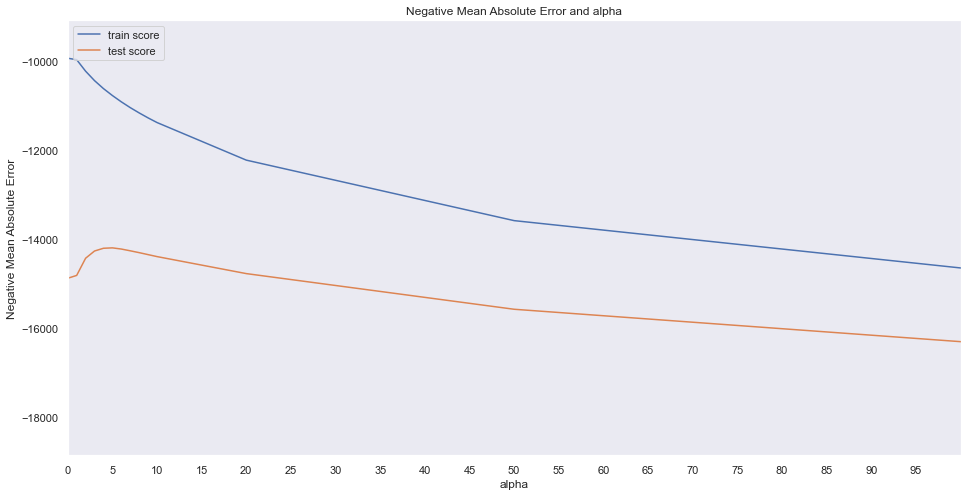

In [66]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
# mean test and train scoes with alpha are plotted

plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [67]:
alpha = 5     # evaluating the ridge regression model by considering alpha value as 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)


y_train_pred = ridge.predict(X_train)  # predicting  y_train
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
train_mse = mean_squared_error(y_train,y_train_pred)
train_rmse = np.sqrt(train_mse)
print("Train R2:", train_r2)
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)

y_test_pred_ridge = ridge.predict(X_test) # predicting y_test
test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge)
test_mse = mean_squared_error(y_test,y_test_pred_ridge)
test_rmse = np.sqrt(test_mse)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
ridge_list = ['ridge_regression',train_r2,test_r2,train_mse,test_mse,train_rmse,test_rmse]

Train R2: 0.940600388504013
Train MSE: 260001836.71583122
Train RMSE: 16124.572450636675
Test R2: 0.9319783377438104
Test MSE: 297712999.6825107
Test RMSE: 17254.361758190615


In [68]:
alpha = 10     # evaluating the ridge regression model by considering alpha value as 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)   # predicting y_train
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
train_mse = mean_squared_error(y_train,y_train_pred)
train_rmse = np.sqrt(train_mse)
print("Train R2:", train_r2)
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)

y_test_pred_ridge = ridge.predict(X_test)  # predicting y_test
test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge)
test_mse = mean_squared_error(y_test,y_test_pred_ridge)
test_rmse = np.sqrt(test_mse)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
ridge_list = ['ridge_regression',train_r2,test_r2,train_mse,test_mse,train_rmse,test_rmse]

Train R2: 0.9351946095095913
Train MSE: 283663817.5273462
Train RMSE: 16842.32221302473
Test R2: 0.9317041672790528
Test MSE: 298912971.99691755
Test RMSE: 17289.099802965957


In [69]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Ridge_Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)  # Features and coefficients are put in a dataframe
ridge_df

Features  Ridge_Coefficient
0              LotFrontage            61.7148
1                  LotArea             1.2261
2                YearBuilt           233.3417
3             YearRemodAdd            68.5653
4               MasVnrArea            -3.1894
..                     ...                ...
264  SaleCondition_AdjLand          1958.0566
265   SaleCondition_Alloca         -6518.2528
266   SaleCondition_Family          -871.7185
267   SaleCondition_Normal          4577.1747
268  SaleCondition_Partial         10519.0093

[269 rows x 2 columns]

In [70]:
model_parameters = list(ridge.coef_)    # model parameters of ridge regression
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-413620.704, 'constant'),
 (22288.026, 'OverallQual_9'),
 (19824.346, 'Neighborhood_StoneBr'),
 (14940.116, 'Neighborhood_Crawfor'),
 (14416.376, 'Functional_Typ'),
 (-13080.524, 'BsmtQual_Gd'),
 (-11506.79, 'OverallQual_4'),
 (-10783.451, 'KitchenQual_Gd'),
 (10519.009, 'SaleCondition_Partial'),
 (10167.873, 'Neighborhood_NridgHt'),
 (9988.079, 'Exterior1st_BrkFace'),
 (-9869.427, 'BsmtQual_TA'),
 (9791.42, 'BsmtExposure_Gd'),
 (-8784.621, 'OverallQual_6'),
 (-8404.974, 'Neighborhood_Edwards'),
 (-8110.623, 'KitchenQual_TA'),
 (8069.618, 'OverallCond_8'),
 (-7608.081, 'Neighborhood_NWAmes'),
 (7538.064, 'BsmtFinType1_GLQ'),
 (-7307.96, 'OverallCond_5'),
 (-7230.781, 'Functional_Mod'),
 (7215.601, 'SaleType_New'),
 (-7190.307, 'ExterQual_TA'),
 (7186.931, 'MSZoning_FV'),
 (-7011.431, 'Neighborhood_Mitchel'),
 (6811.015, 'OverallQual_8'),
 (-6785.891, 'OverallQual_7'),
 (6726.076, 'OverallQual_10'),
 (-6518.253, 'SaleCondition_Alloca'),
 (-6466.432, 'OverallQual_5'),
 (-6459.404, 'Nei

### RFE

#### Automated selection of variables for prediction

In [71]:
rfe = RFE(lr, 30)   # By assuming the outputnumber of the variable as 30 RFE is running    
rfe = rfe.fit(X_train, y_train)

In [72]:
auto_selected_predictors = X_train.columns[rfe.support_]  # top 30 columns are selected in RFE and listed out
auto_selected_predictors       #  Automated selection of Predictors

Index(['YearBuilt', 'FullBath', 'DiffYearBuilt', 'MSSubClass_45',
       'Street_Pave', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_9',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior2nd_ImStucc',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'Heating_Grav', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageQual_Po', 'SaleType_CWD'],
      dtype='object')

In [73]:
def make_lr_model_mp(cols,):
    cols=list(cols)
    X_train_lr = sm.add_constant(X_train[cols])  # constant is added for the X_train of linear regression model
    lr = sm.OLS(y_train, X_train_lr).fit()
    print('*'*100)                               
    print(f'Parameters obtained for {cols}')
    print('*'*100)
    print(lr.params)                             # Checking the parameters obtained by linear regression model
    print('*'*100,'\n')
    print('*'*100)
    print(lr.summary())                          # the summary obtained by the linear regression is printed
    print('*'*100,'\n')
    # Creating a dataframe for all the feature variables and their respective VIFs and that will contain their names 
    print('*'*100)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('*'*100)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### Model 1 - Consider the columns selected by RFE for model 1

In [74]:
make_lr_model_mp(list(df[auto_selected_predictors]))# columns selected by RFE is considered here to know the params

****************************************************************************************************
Parameters obtained for ['YearBuilt', 'FullBath', 'DiffYearBuilt', 'MSSubClass_45', 'Street_Pave', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_9', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior2nd_ImStucc', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'Heating_Grav', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageQual_Po', 'SaleType_CWD']
****************************************************************************************************
const                      -0.182044
YearBuilt                  73.302712
FullBath                33958.902116
DiffYearBuilt            -441.394699
MSSubClass_45          -56212.675839
Street_Pave             54660.380959

#### Model 2 - Consider the columns selected by lasso for model 2

In [75]:
make_lr_model_mp(list(df[lasso_selected_features]))# columns selected by lasso is considered here to know the params

****************************************************************************************************
Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'OverallQual_10', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'Exterior1st_BrkFace', 'Neighborhood_NridgHt', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'MSZoning_FV', 'BsmtQual_TA', 'OverallQual_4', 'OverallCond_5', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'Neighborhood_BrkSide', 'OverallCond_8', 'Neighborhood_NoRidge', 'ExterQual_TA', 'KitchenQual_TA', 'SaleCondition_Alloca', 'MSSubClass_160', 'Condition1_Norm', 'ExterCond_TA', 'MasVnrType_Stone', 'SaleCondition_Normal', 'Foundation_PConc', 'Neighborhood_NWAmes']
****************************************************************************************************
const                    161509.901793
OverallQual_9            100799.965909
Neighborhood_StoneBr      42236.454738
Neighborhood_Crawfor      32892.565355
OverallQual_10            95

#### Model 3 - Consider the features selected by lasso for model 3 and remove Functional_Typ parameter from lasso

In [76]:
lasso_selected_features.remove('Functional_Typ') # the Functional_typ param is removed from the obtained features 
make_lr_model_mp(list(df[lasso_selected_features]))

****************************************************************************************************
Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'OverallQual_10', 'SaleCondition_Partial', 'OverallQual_8', 'Exterior1st_BrkFace', 'Neighborhood_NridgHt', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'MSZoning_FV', 'BsmtQual_TA', 'OverallQual_4', 'OverallCond_5', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'Neighborhood_BrkSide', 'OverallCond_8', 'Neighborhood_NoRidge', 'ExterQual_TA', 'KitchenQual_TA', 'SaleCondition_Alloca', 'MSSubClass_160', 'Condition1_Norm', 'ExterCond_TA', 'MasVnrType_Stone', 'SaleCondition_Normal', 'Foundation_PConc', 'Neighborhood_NWAmes']
****************************************************************************************************
const                    164888.872906
OverallQual_9            100919.720325
Neighborhood_StoneBr      42385.806286
Neighborhood_Crawfor      32862.624904
OverallQual_10            95431.655074
SaleCon

#### Model 4 - Consider the features selected by lasso for model 4 and remove OverallCond_5 parameter from lasso

In [77]:
lasso_selected_features.remove('OverallCond_5') # the OverallCond_5 param is removed from the obtained features 
make_lr_model_mp(list(df[lasso_selected_features]))

****************************************************************************************************
Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'OverallQual_10', 'SaleCondition_Partial', 'OverallQual_8', 'Exterior1st_BrkFace', 'Neighborhood_NridgHt', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'MSZoning_FV', 'BsmtQual_TA', 'OverallQual_4', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'Neighborhood_BrkSide', 'OverallCond_8', 'Neighborhood_NoRidge', 'ExterQual_TA', 'KitchenQual_TA', 'SaleCondition_Alloca', 'MSSubClass_160', 'Condition1_Norm', 'ExterCond_TA', 'MasVnrType_Stone', 'SaleCondition_Normal', 'Foundation_PConc', 'Neighborhood_NWAmes']
****************************************************************************************************
const                    164183.439790
OverallQual_9            100876.414218
Neighborhood_StoneBr      42470.263100
Neighborhood_Crawfor      33166.457373
OverallQual_10            95472.793370
SaleCondition_Partial   

#### Model 5 - Consider the features selected by lasso for model 5 and remove KitchenQual_Gd parameter from lasso

In [78]:
lasso_selected_features.remove('KitchenQual_Gd') # the KitchenQual_Gd param is removed from the obtained features 
make_lr_model_mp(list(df[lasso_selected_features]))

****************************************************************************************************
Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'OverallQual_10', 'SaleCondition_Partial', 'OverallQual_8', 'Exterior1st_BrkFace', 'Neighborhood_NridgHt', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'MSZoning_FV', 'BsmtQual_TA', 'OverallQual_4', 'BsmtFinType1_GLQ', 'Neighborhood_BrkSide', 'OverallCond_8', 'Neighborhood_NoRidge', 'ExterQual_TA', 'KitchenQual_TA', 'SaleCondition_Alloca', 'MSSubClass_160', 'Condition1_Norm', 'ExterCond_TA', 'MasVnrType_Stone', 'SaleCondition_Normal', 'Foundation_PConc', 'Neighborhood_NWAmes']
****************************************************************************************************
const                    160926.809731
OverallQual_9            103249.604842
Neighborhood_StoneBr      42807.845801
Neighborhood_Crawfor      33437.108837
OverallQual_10            98777.074813
SaleCondition_Partial     37858.168102
Ove

#### Model 6 - Consider the features selected by lasso for model 6 and remove OverallCond_8 parameter from lasso

In [79]:
lasso_selected_features.remove('OverallCond_8') # the OverallCond_8 param is removed from the obtained features 
make_lr_model_mp(list(df[lasso_selected_features]))

****************************************************************************************************
Parameters obtained for ['OverallQual_9', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'OverallQual_10', 'SaleCondition_Partial', 'OverallQual_8', 'Exterior1st_BrkFace', 'Neighborhood_NridgHt', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'MSZoning_FV', 'BsmtQual_TA', 'OverallQual_4', 'BsmtFinType1_GLQ', 'Neighborhood_BrkSide', 'Neighborhood_NoRidge', 'ExterQual_TA', 'KitchenQual_TA', 'SaleCondition_Alloca', 'MSSubClass_160', 'Condition1_Norm', 'ExterCond_TA', 'MasVnrType_Stone', 'SaleCondition_Normal', 'Foundation_PConc', 'Neighborhood_NWAmes']
****************************************************************************************************
const                    161965.634119
OverallQual_9            103079.271203
Neighborhood_StoneBr      42614.622236
Neighborhood_Crawfor      34228.308280
OverallQual_10            98576.660153
SaleCondition_Partial     38033.038490
OverallQual_8       

In [80]:
model = [linear,ridge_list,lasso_list] 
# Creating a 2d table to list down the mse, r2 and rmse value for the list of models given above
model_data = pd.DataFrame(columns=['model_name', 'Train_R2', 'Test_R2', 'Train_MSE', 'Test_MSE', 
                                 'Train_RMSE', 'Test_RMSE'], data=model)
model_data

model_name  Train_R2   Test_R2     Train_MSE      Test_MSE  \
0  linear_regression  0.949489  0.895161  2.210963e+08  4.588511e+08   
1   ridge_regression  0.935195  0.931704  2.836638e+08  2.989130e+08   
2   lasso_regression  0.934522  0.930362  2.866083e+08  3.047894e+08   

     Train_RMSE     Test_RMSE  
0  14869.305908  21420.809429  
1  16842.322213  17289.099803  
2  16929.510135  17458.219579

In [81]:
new_data = pd.merge(linear_df,ridge_df,on='Features') # Concatenated linear and ridge df to new data
new_df = pd.merge(new_data,lasso_df,on='Features') # again concatenated new data and lasso df to new data 
new_df

Features  linear_Coefficient  Ridge_Coefficient  \
0              LotFrontage             -7.4690            61.7148   
1                  LotArea              1.8226             1.2261   
2                YearBuilt            252.1711           233.3417   
3             YearRemodAdd             32.2483            68.5653   
4               MasVnrArea             -6.7166            -3.1894   
..                     ...                 ...                ...   
264  SaleCondition_AdjLand          46458.1591          1958.0566   
265   SaleCondition_Alloca         -48120.0229         -6518.2528   
266   SaleCondition_Family           1419.1910          -871.7185   
267   SaleCondition_Normal           8557.7286          4577.1747   
268  SaleCondition_Partial          36994.6811         10519.0093   

     Lasso_Coefficient  
0              70.9276  
1               1.1247  
2             795.3451  
3             144.3747  
4              -2.5187  
..                 ...  
264             0.0000  
265         -6295.0717  
266            -0.0000  
267          4981.0827  
268         20007.4718  

[269 rows x 4 columns]

In [82]:
print(len(new_df[new_data['linear_Coefficient']==0])) # printing the length of linear coefficient present in new_data
new_df[new_data['linear_Coefficient']==0]

20


Features  linear_Coefficient  Ridge_Coefficient  \
14          BsmtHalfBath                 0.0                0.0   
18          KitchenAbvGr                 0.0                0.0   
29              PoolArea                 0.0                0.0   
59      Utilities_NoSeWa                 0.0                0.0   
100      Condition2_PosA                 0.0                0.0   
101      Condition2_PosN                 0.0                0.0   
102      Condition2_RRAe                -0.0                0.0   
103      Condition2_RRAn                 0.0                0.0   
111    HouseStyle_2.5Fin                -0.0                0.0   
135       RoofStyle_Shed                -0.0                0.0   
137     RoofMatl_Membran                 0.0                0.0   
138       RoofMatl_Metal                -0.0                0.0   
139        RoofMatl_Roll                -0.0                0.0   
151    Exterior1st_Stone                 0.0                0.0   
156  Exterior2nd_AsphShn                -0.0                0.0   
166    Exterior2nd_Stone                -0.0                0.0   
205         Heating_OthW                -0.0                0.0   
208         HeatingQC_Po                 0.0                0.0   
222       Functional_Sev                 0.0                0.0   
262         SaleType_Oth                 0.0                0.0   

     Lasso_Coefficient  
14                 0.0  
18                 0.0  
29                 0.0  
59                 0.0  
100                0.0  
101                0.0  
102                0.0  
103                0.0  
111                0.0  
135                0.0  
137                0.0  
138                0.0  
139                0.0  
151                0.0  
156                0.0  
166                0.0  
205                0.0  
208                0.0  
222                0.0  
262                0.0

In [83]:
print(len(new_df[new_df['Lasso_Coefficient']==0]))# printing the length of lasso coefficient present in new_df
new_df[new_df['Lasso_Coefficient']==0]

159


Features  linear_Coefficient  Ridge_Coefficient  \
14            BsmtHalfBath              0.0000             0.0000   
18            KitchenAbvGr              0.0000             0.0000   
29                PoolArea              0.0000             0.0000   
32        DiffYearRemodAdd            -32.2483           -68.5653   
34           MSSubClass_30            162.9086          1051.8407   
..                     ...                 ...                ...   
261           SaleType_New         -13557.7016          7215.6010   
262           SaleType_Oth              0.0000             0.0000   
263            SaleType_WD           1002.7847          -962.7770   
264  SaleCondition_AdjLand          46458.1591          1958.0566   
266   SaleCondition_Family           1419.1910          -871.7185   

     Lasso_Coefficient  
14                 0.0  
18                 0.0  
29                 0.0  
32                 0.0  
34                 0.0  
..                 ...  
261                0.0  
262                0.0  
263                0.0  
264                0.0  
266               -0.0  

[159 rows x 4 columns]

In [84]:
print(len(new_df[new_data['Ridge_Coefficient']==0])) # printing the length of ridge coefficient present in new_data
new_df[new_data['Ridge_Coefficient']==0]

20


Features  linear_Coefficient  Ridge_Coefficient  \
14          BsmtHalfBath                 0.0                0.0   
18          KitchenAbvGr                 0.0                0.0   
29              PoolArea                 0.0                0.0   
59      Utilities_NoSeWa                 0.0                0.0   
100      Condition2_PosA                 0.0                0.0   
101      Condition2_PosN                 0.0                0.0   
102      Condition2_RRAe                -0.0                0.0   
103      Condition2_RRAn                 0.0                0.0   
111    HouseStyle_2.5Fin                -0.0                0.0   
135       RoofStyle_Shed                -0.0                0.0   
137     RoofMatl_Membran                 0.0                0.0   
138       RoofMatl_Metal                -0.0                0.0   
139        RoofMatl_Roll                -0.0                0.0   
151    Exterior1st_Stone                 0.0                0.0   
156  Exterior2nd_AsphShn                -0.0                0.0   
166    Exterior2nd_Stone                -0.0                0.0   
205         Heating_OthW                -0.0                0.0   
208         HeatingQC_Po                 0.0                0.0   
222       Functional_Sev                 0.0                0.0   
262         SaleType_Oth                 0.0                0.0   

     Lasso_Coefficient  
14                 0.0  
18                 0.0  
29                 0.0  
59                 0.0  
100                0.0  
101                0.0  
102                0.0  
103                0.0  
111                0.0  
135                0.0  
137                0.0  
138                0.0  
139                0.0  
151                0.0  
156                0.0  
166                0.0  
205                0.0  
208                0.0  
222                0.0  
262                0.0

In [85]:
lasso_selected_features    # Final features selected and extracted by RFE for lasso regression

['OverallQual_9',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'OverallQual_10',
 'SaleCondition_Partial',
 'OverallQual_8',
 'Exterior1st_BrkFace',
 'Neighborhood_NridgHt',
 'BsmtQual_Gd',
 'BsmtExposure_Gd',
 'MSZoning_FV',
 'BsmtQual_TA',
 'OverallQual_4',
 'BsmtFinType1_GLQ',
 'Neighborhood_BrkSide',
 'Neighborhood_NoRidge',
 'ExterQual_TA',
 'KitchenQual_TA',
 'SaleCondition_Alloca',
 'MSSubClass_160',
 'Condition1_Norm',
 'ExterCond_TA',
 'MasVnrType_Stone',
 'SaleCondition_Normal',
 'Foundation_PConc',
 'Neighborhood_NWAmes']

### Observation:
- With the most of the coefficients as non-zero values simple linear regression and ridge regression gave us a complex model.
- simple linear regression and ridge regression did not assist us in feature selection.
- with the most of the coeffiecients as zero values lasso regression gave us a simpler and complex free model.
- Also lasso regression only assisted us in feature selection whereas ridge and simple linear regression did not.
- Adjuated r2 value of lasso regression after RFE was 0.751.
- VIF was fine and P value was also good.

## Visualization of actual and predicted values

Text(0, 0.5, 'Sales Price')

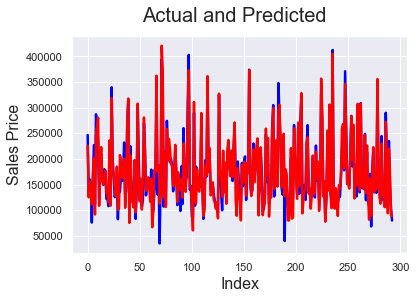

In [86]:
# Visualization of actual and predicted values conducted by the features of simple linear regression
c = [i for i in range(0,y_test.shape[0],1)] 
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=16)                              
plt.ylabel('Sales Price', fontsize=16) 

Text(0, 0.5, 'Sales Price')

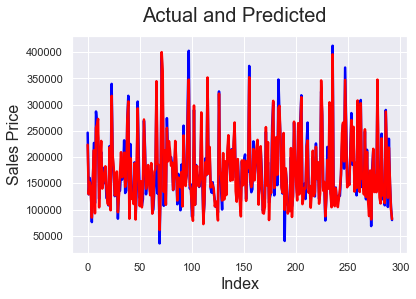

In [87]:
# Visualization of actual and predicted values conducted by the features of lasso regression
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=16)                               
plt.ylabel('Sales Price', fontsize=16) 

Text(0, 0.5, 'Sales Price')

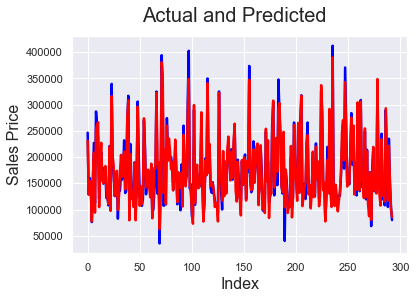

In [88]:
# Visualization of actual and predicted values conducted by the features of ridge regression
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=16)                               
plt.ylabel('Sales Price', fontsize=16)   

## Conclusion

Optimum lambda value of lasso regression is 100
optimum lambda value of ridge regression is 5
Lasso regression helped in feature selection whereas ridge and simple linear regression did not
The final feature selected or extracted by lasso regression are as follows:
  - 'OverallQual_9',
  - 'Neighborhood_StoneBr',
  - 'Neighborhood_Crawfor',
  - 'OverallQual_10',
  - 'SaleCondition_Partial',
  - 'OverallQual_8',
  - 'Exterior1st_BrkFace',
  - 'Neighborhood_NridgHt',
  - 'BsmtQual_Gd',
  - 'BsmtExposure_Gd',
  - 'MSZoning_FV',
  - 'BsmtQual_TA',
  - 'OverallQual_4',
  - 'BsmtFinType1_GLQ',
  - 'Neighborhood_BrkSide',
  - 'Neighborhood_NoRidge',
  - 'ExterQual_TA',
  - 'KitchenQual_TA',
  - 'SaleCondition_Alloca',
  - 'MSSubClass_160',
  - 'Condition1_Norm',
  - 'ExterCond_TA',
  - 'MasVnrType_Stone',
  - 'SaleCondition_Normal',
  - 'Foundation_PConc',
  - 'Neighborhood_NWAmes'  
  
From the list of above selected features most of them major are infuencers for sales pricing except few and they are :
- OverallQual
- Neighborhood
- SaleCondition
- BsmtQual
- BsmtExposure
- MSZoning
- Exterior1st
- BsmtFinType1
- MSSubClass
- MasVnrType 